
# **MIS710 Lab 5 - Introduction to Decision Trees**

**Author: Associate Professor Lemai Nguyen**

Objective: To learn ML using decision trees for classification and estimatatiom, and gain practical skills to develop decision tree models and evaluate their performances


**Import Libraries and Functions**

Read about Logistic Regression at:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Train Test Split:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

Classification metrics:
https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

# **Task 1: Breast Cancer Diagnosis**

**Breast Cancer Diagnosis**
Predict the diagnosis (healthy or cancerous) based on a biopsy dataset.

**Context**: The dataset was adapted from a biospy dataset. The dataset contains five (5) biological variables and the target variable.

**Data**:
V1, V2, V7-V9: biological variables

Diagnosis: healthy or cancerous

**Source**: adapted from a dataset provided by Dr Mark Griffin, Industry Fellow, University of Queensland; also available at: https://www.kaggle.com/datasets/ukveteran/biopsy-data-on-breast-cancer-patients

## **1.1 Import libraries and functions**

In [1]:
!pip install pydotplus #interface for graph visualisation
!pip install graphviz #for graph visualisation

In [2]:
# import libraries
import pandas as pd #for data manipulation and analysis
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
#from pandas.io.parsers.readers import annotations

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifi

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for model evaluation

#print confusion matrix and evaluation report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

## **1.2 Load data**

In [3]:
url='https://raw.githubusercontent.com/ABAL-DU/MIS710-Resources/main/Week%205/biopsy_ln.csv'

In [4]:
# load dataset
records = pd.read_csv(url)


## **1.3 Inspect and pre-process data**

In [5]:
#explore the dataset
print(records)

          ID  V1  V2  V7  V8  V9 diagnosis
0    1177399   8   3   1   6   2   healthy
1    1246562  10   2   1   1   2   healthy
2    1108370   9   5   2   1   5   healthy
3    1165926   9   6   2   9  10   healthy
4    1167439   2   3   2   5   1   healthy
..       ...  ..  ..  ..  ..  ..       ...
694  1124651   1   3   7   2   1   healthy
695  1137156   2   2   7   1   1   healthy
696  1147044   3   1   7   1   1   healthy
697  1213375   8   4   7   8   2   healthy
698   721482   4   4   7   3   1   healthy

[699 rows x 7 columns]


In [6]:
##write your code to examine shape and data types
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         699 non-null    int64 
 1   V1         699 non-null    int64 
 2   V2         699 non-null    int64 
 3   V7         699 non-null    int64 
 4   V8         699 non-null    int64 
 5   V9         699 non-null    int64 
 6   diagnosis  699 non-null    object
dtypes: int64(6), object(1)
memory usage: 38.4+ KB


### **Inspect missing data**

In [7]:
##write your code to inspect missing data
records.isnull().sum()

ID           0
V1           0
V2           0
V7           0
V8           0
V9           0
diagnosis    0
dtype: int64

In [8]:
##write your code to drop irrelevant variables
records=records.drop(['ID'], axis=1)

## **1.4 Conduct Exploratory Data Analysis (EDA)**
1. Univariate analysis
2. Bivariate analysis
3. Multivariate analysis

Note:
> Numeric variables
*   Summarise data through mean, median (Q2), Q1, Q3, range, Interquartile Range (IQR), outliers, standard deviation, and variance.
*   Explore distributions using histograms, boxplots, kernel density estimates, and QQ plots of continuous variables.

> Categorical variables
*   Summarise data through mode(s), counts and percentages of unique categories.
*   Explore bar charts, pie charts, or frequency tables of categorical variables.

> Explore relationships between two or more variables  
*   Compare two continuous variables using their descriptive statistics (such as means, medians, and Inter Quartile Range (IQR), range) and explore the relationship between them using scatterplots and correlation coefficients.
*   Explore the relationship between two categorical variables using a two-way contingency table (crosstab), clustered bar charts, stacked bar charts or a mosaic plot.
*   Explore the relationship between one numeric and one categorical variable, through using and grouped boxplots, violin plots, and histograms.
*   Explore correlations among multiple (selected) numeric variables using heatmaps of the correlation matrix.


Note: You can also explore logistic regression relationships between two variables. Convert data as needed

**Univariate Analysis**

*Summarise the target variable*

In [9]:
##write your code to view frequencies of diagnostic values
records['diagnosis'].value_counts()

diagnosis
healthy      489
cancerous    210
Name: count, dtype: int64

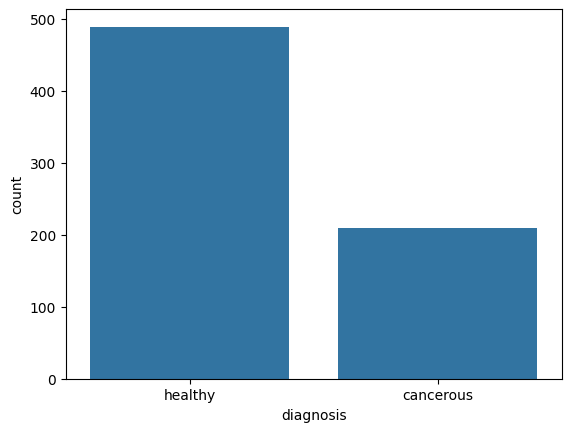

In [10]:
##write your code to create barchats to examine the distribution of the target variable
plot=sns.countplot(data=records, x='diagnosis')
plt.show()

*Summarise and describe numeric vairables*

In [11]:
##write your code to view descriptive statistics of numeric variables
records.describe()

,V1,V2,V7,V8,V9
count,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


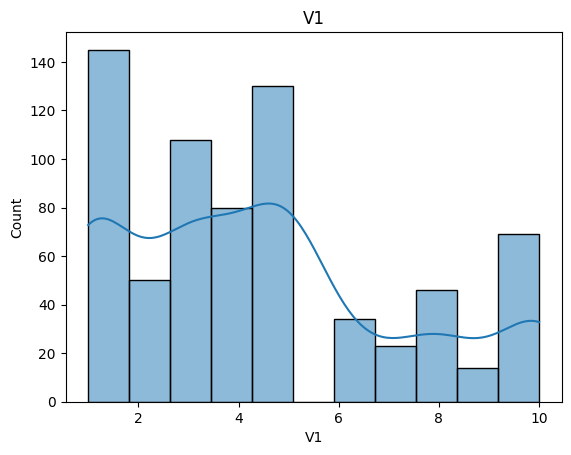

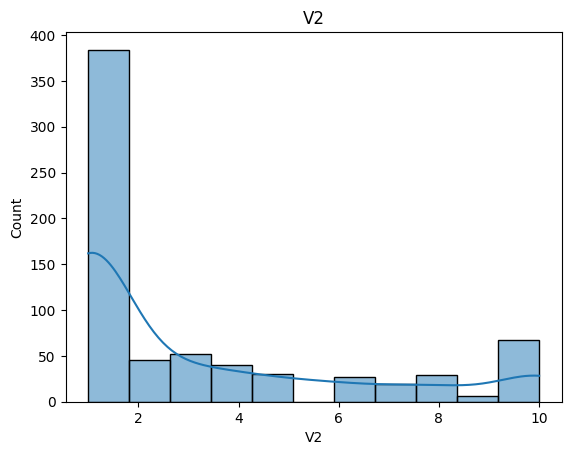

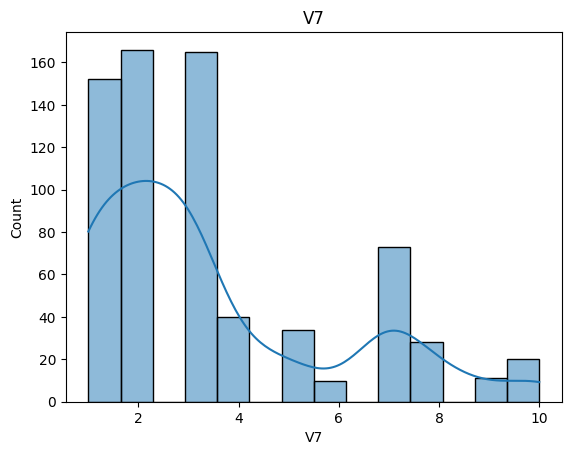

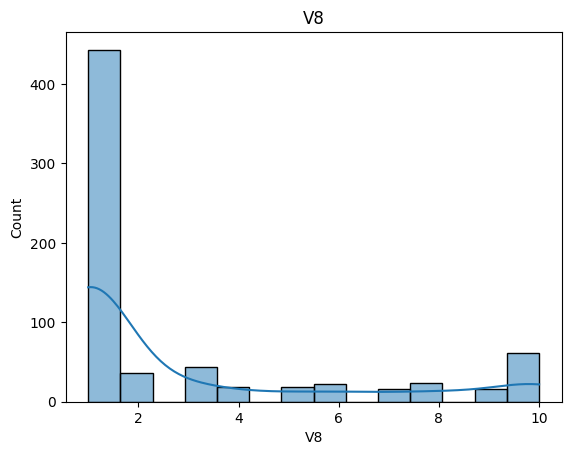

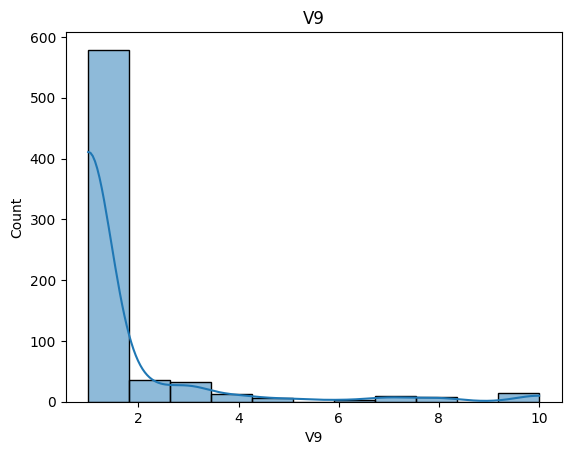

In [12]:
#create histograms
for i in records.iloc[:,:5]:
    sns.histplot(records[i], kde=True)
    plt.title(i)
    plt.show()

**Bivariable analysis**

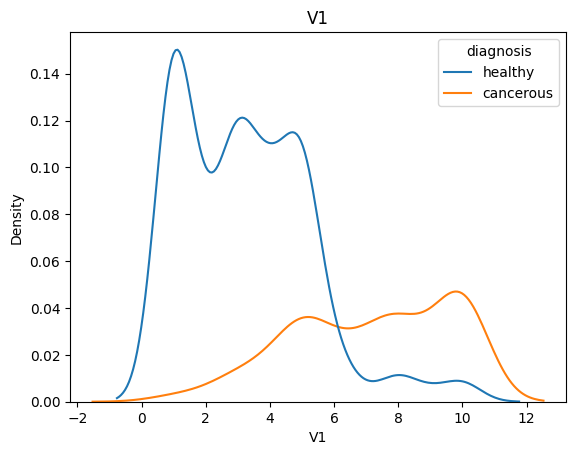

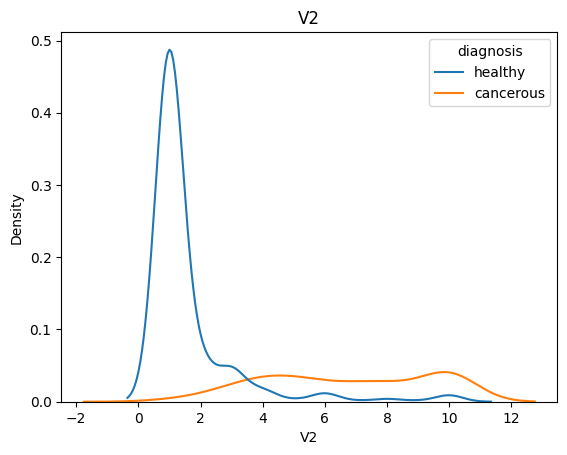

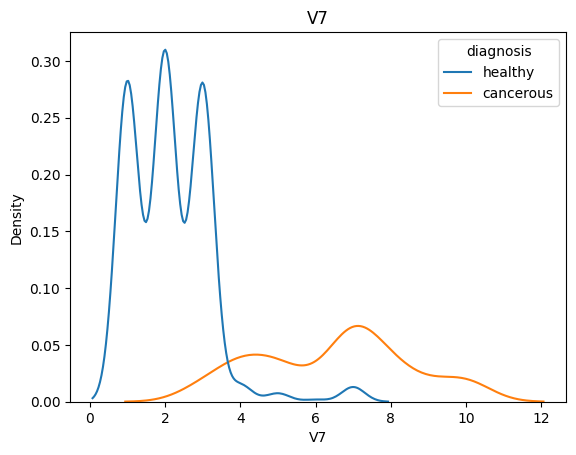

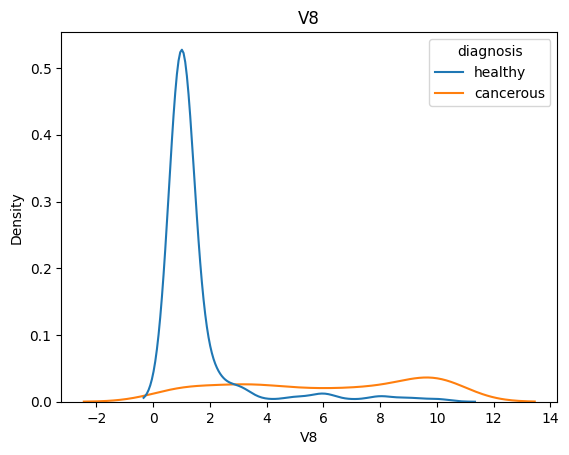

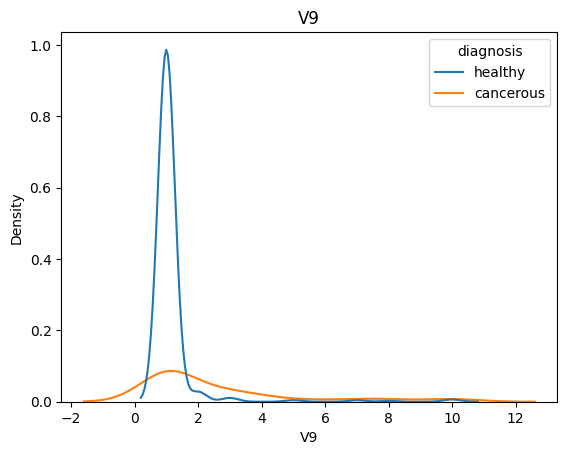

In [13]:
##write your code to create histograms for all variables records.iloc[:,:5] grouped by diagnosis
for i in records.iloc[:,:5]:
    sns.kdeplot(data=records, x=records[i], hue= 'diagnosis', legend=True)
    plt.title(i)
    plt.show()

*Multivariate analysis*

<Axes: >

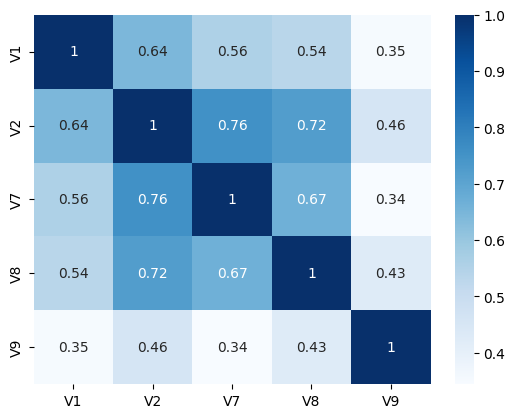

In [14]:
sns.heatmap(data=records.iloc[:,:5].corr(), cmap="Blues", annot=True)

## **1.5 Convert categorical data to numeric**
Define your own function and call it

In [15]:
#convert categorical data to numerical
def coding_diagnosis(x):
        if x=='cancerous': return 1
        if x=='healthy': return 0

records['diagnosis'] = records['diagnosis'].apply(coding_diagnosis)

print(records.sample(10))

     V1  V2  V7  V8  V9  diagnosis
577   8   3   3   2   1          0
388   3   1   1   1   1          0
295   1   1   1   1   1          0
440   1   1   2   1   1          0
645   5   3   3   1   1          0
534   3   1   2   1   1          0
588   5   1   3   1   1          0
202  10   6   8   6   1          1
377   4   1   1   1   1          0
651   3   3   3   5   1          0


Multivariate analysis with **numeric target**

<Axes: >

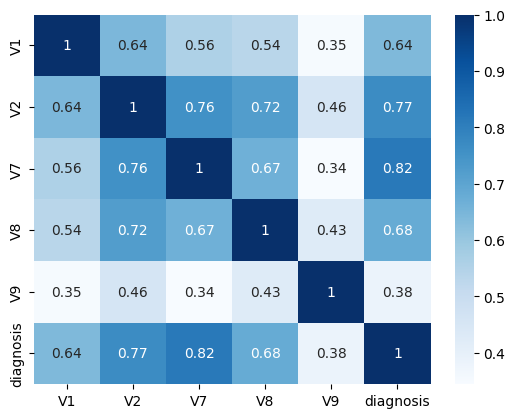

In [16]:
##write your code to generate a heatmap, now including the numeric target
sns.heatmap(data=records.corr(), cmap="Blues", annot=True)

In [17]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   V1         699 non-null    int64
 1   V2         699 non-null    int64
 2   V7         699 non-null    int64
 3   V8         699 non-null    int64
 4   V9         699 non-null    int64
 5   diagnosis  699 non-null    int64
dtypes: int64(6)
memory usage: 32.9 KB


## **1.6 Select Features and Target**

Select predictors (attributes) for Classification

Set role (Target)

In [18]:
##write your code to select predictors and label
features = records.columns[0:5]
X=records[features]  #Input data
y=records['diagnosis'] # Target variable

## **1.7 Split the Dataset**

Split arrays or matrices into random train and test subsets
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

In [19]:
##write your code to split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)  # 80% training and 20% testing

#inspect the split datasets
print(X_train.head())
print(y_train.head())

print('Training dataset size:',X_train.shape[0])
print('Test dataset size:',X_test.shape[0])


     V1  V2  V7  V8  V9
463   5   3   2   1   1
198   5   8   8  10   3
306   3   1   1   1   1
337   3   1   1   1   1
126   8   2   7   1   1
463    0
198    1
306    0
337    0
126    1
Name: diagnosis, dtype: int64
Training dataset size: 559
Test dataset size: 140


## **1.8 Train a Logistic Regression Model and Make Predictions**

(Model implementation)

1.  Initialise /create an empty object decisiontreeclassifier (model)
2.  Train the model using the training dataset
3.  Make prediction using the model for the test dataset


Read about DecisionTreeClassifier at: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html



In [20]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3) #default criterion is gini, max_depth=25

In [21]:
##write your code to train Decision Tree Classifer with the traning dataset. Hint: use .fit(X_train, y_train)
clf = clf.fit(X_train, y_train)


In [22]:
##write your code to make predictions for the test dataset. Hint use .predict(X_test)
y_pred = clf.predict(X_test)


**Inspect Predictions**

This is for learning purposes, so you can feel what predictions look like.

In [23]:
#join unseen y_test with predicted value into a data frame
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

#join X_test with the new dataframe
inspection=pd.concat([X_test,inspection], axis=1)

inspection.sample(20)

,V1,V2,V7,V8,V9,Actual,Predicted
169,6,10,7,10,1,1,1
281,4,1,1,1,1,0,0
462,3,2,2,2,1,0,0
558,1,1,3,1,1,0,0
498,5,1,2,1,1,0,0
193,6,8,8,9,2,1,1
77,8,7,5,5,4,1,1
526,4,1,2,1,1,0,0
247,1,1,1,1,1,0,0
234,5,10,10,1,1,1,1


## **1.9 Evaluate Model Performance**


(Performance Evaluation)


1. Generate confusion matrix and classification report   
2. Calculate Accuracy, Precision, Recall, F1 separately when needed


Classification metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics







In [24]:
#print confusion matrix and evaluation report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[96  2]
 [ 5 37]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        98
           1       0.95      0.88      0.91        42

    accuracy                           0.95       140
   macro avg       0.95      0.93      0.94       140
weighted avg       0.95      0.95      0.95       140



In [25]:
#Model Evaluation, calculate metrics: Accuracy, Precision, Recall, F1,
print("Accuracy: ", '%.3f' % metrics.accuracy_score(y_test,y_pred))
print("Precision: ",'%.3f' % metrics.precision_score(y_test,y_pred))
print("Recall: ", '%.3f' % metrics.recall_score(y_test,y_pred))
print("F1: ", '%.3f' % metrics.f1_score(y_test,y_pred))


Accuracy:  0.950
Precision:  0.949
Recall:  0.881
F1:  0.914


### **Plot ROC (Receiver operating characteristic) curve and confusion matrix**

ROC surve
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html?highlight=plot_roc_curve#sklearn.metrics.plot_roc_curve

Confusion matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html?highlight=plot%20confusion%20matrix#sklearn.metrics.plot_confusion_matrix

In [26]:
#get predicted probabilities for the main class
y_pred_probs = clf.predict_proba(X_test)
y_pred_probs = y_pred_probs[:, 1]

#for you to see the probabilities
y_pred_probs

array([0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.92307692, 0.        ,
       0.        , 1.        , 0.        , 0.33333333, 0.        ,
       0.92307692, 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.33333333, 0.33333333, 0.        , 0.92307692, 0.        ,
       0.        , 0.92307692, 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.33333333,
       0.87804878, 0.87804878, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.33333333, 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.33333333, 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.33333333, 0.        , 0.     

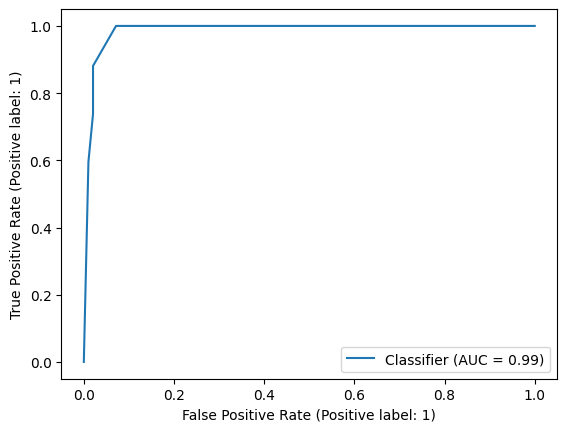

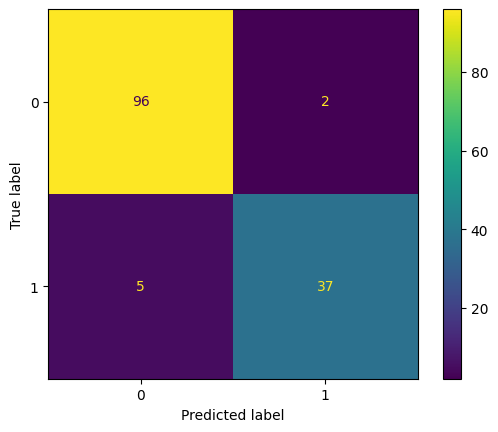

In [27]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_probs)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## **1.10 Visualise the trees**

Not all classification machine learning models can be visualised.

### **Option 1: Extract rules and visualise the model**

In [28]:
#Import plot_tree to  extract rules and visualise the decition tree model
from sklearn.tree import plot_tree, export_text
from pandas.io.parsers.readers import annotations


In [29]:
# Convert feature_names to a list if it's an Index object
feature_names = list(features) if isinstance(features, pd.Index) else features

# Extract the decision rules
rules = export_text(clf, feature_names=feature_names)
print(rules)

|--- V7 <= 3.50
|   |--- V8 <= 2.50
|   |   |--- class: 0
|   |--- V8 >  2.50
|   |   |--- V7 <= 2.50
|   |   |   |--- class: 0
|   |   |--- V7 >  2.50
|   |   |   |--- class: 0
|--- V7 >  3.50
|   |--- V2 <= 4.50
|   |   |--- V1 <= 4.50
|   |   |   |--- class: 0
|   |   |--- V1 >  4.50
|   |   |   |--- class: 1
|   |--- V2 >  4.50
|   |   |--- V7 <= 4.50
|   |   |   |--- class: 1
|   |   |--- V7 >  4.50
|   |   |   |--- class: 1



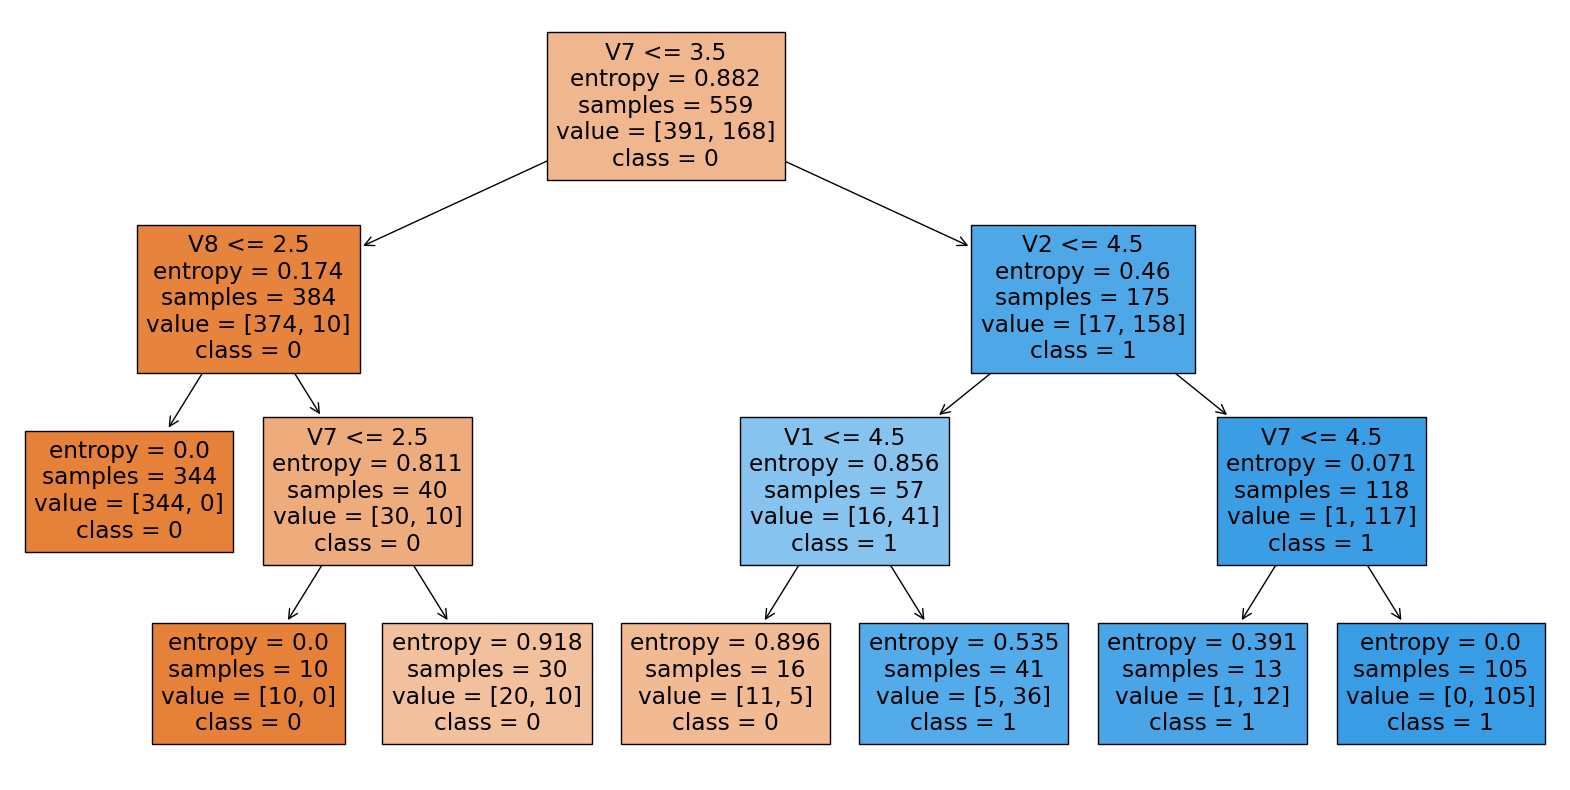

In [30]:
# visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=features, class_names=['0','1'])
plt.show()

**Discuss the Interpretability vs Explainability of the model**

Interpretability relates to understanding how a machine learning model works, i.e., how it makes predictions based on input data.

Explainability focuses on whether the model's decision-making process makes sense from a human perspective.

An explainable model not only provides predictions but also provides human-understandable explanations or justifications for those predictions.

Observe the rules and discuss Explainable AI

### **Option 2: Use pydotplus**

In [31]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

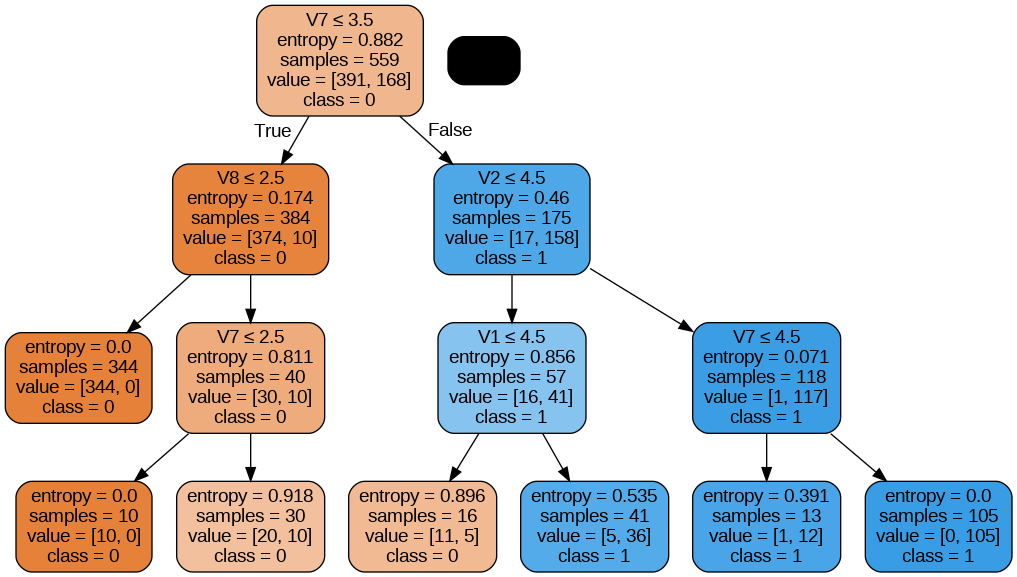

In [32]:
#Import libraries and classes
from six import StringIO
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Biopsy.png')
Image(graph.create_png())

# **Task 2: Titanic**
Dataset: Titanic

Source: https://www.kaggle.com/c/titanic

## **2.1 Import libraries and functions**

In [33]:
# import libraries
import pandas as pd #for data manipulation and analysis
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from pandas.io.parsers.readers import annotations

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for model evaluation

#print confusion matrix and evaluation report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

## **2.2 Load data**

In [34]:
url='https://raw.githubusercontent.com/ABAL-DU/MIS710-Resources/main/Week%205/titanic_train.csv'
# load dataset
records = pd.read_csv(url)

## **2.3 Inspect and pre-process data**

In [35]:
records.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
#drop irrelevant variables
records=records.drop(['PassengerId','Cabin','Name','Ticket'], axis=1)

In [38]:
records

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


### **Inspect missing data**

In [39]:
#Check missing data
records.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [40]:
#Fill in missing numerical data with mean and categorical data with mode
records['Age'].fillna(records['Age'].median(),inplace=True)
records['Embarked'].fillna(records['Embarked'].mode()[0], inplace=True) #there can be more than one mode

## **2.4 Conduct Exploratory Data Analysis (EDA)**
1. Univariate analysis
2. Bivariate analysis
3. Multivariate analysis

Note:
> Numeric variables
*   Summarise data through mean, median (Q2), Q1, Q3, range, Interquartile Range (IQR), outliers, standard deviation, and variance.
*   Explore distributions using histograms, boxplots, kernel density estimates, and QQ plots of continuous variables.

> Categorical variables
*   Summarise data through mode(s), counts and percentages of unique categories.
*   Explore bar charts, pie charts, or frequency tables of categorical variables.

> Explore relationships between two or more variables  
*   Compare two continuous variables using their descriptive statistics (such as means, medians, and Inter Quartile Range (IQR), range) and explore the relationship between them using scatterplots and correlation coefficients.
*   Explore the relationship between two categorical variables using a two-way contingency table (crosstab), clustered bar charts, stacked bar charts or a mosaic plot.
*   Explore the relationship between one numeric and one categorical variable, through using and grouped boxplots, violin plots, and histograms.
*   Explore correlations among multiple (selected) numeric variables using heatmaps of the correlation matrix.


3. Convert data as needed
You can also explore logistic regression relationships between two variables.

In [41]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


**Explore the target variable**

In [42]:
#write your code to analyse the target variable
records['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

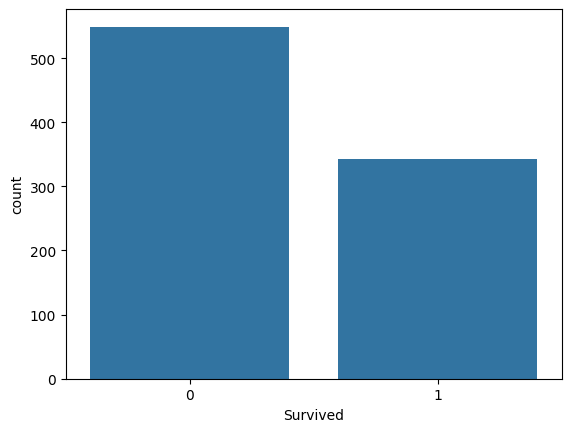

In [43]:
#write your code to generate a barchart for the target variable
sns.countplot(data=records, x='Survived')

**Explore numeric data**

In [44]:
records.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age'>

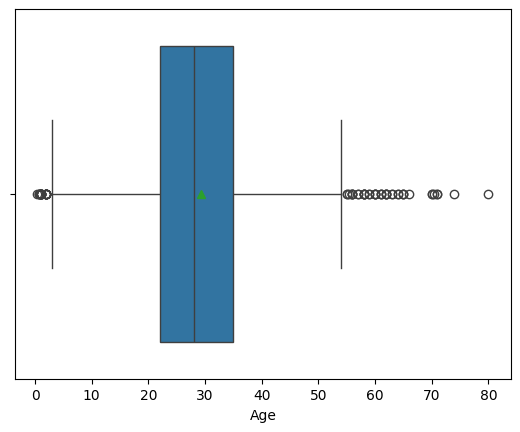

In [45]:
sns.boxplot(data=records, x='Age', showmeans=True)

In [46]:
records.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare'>

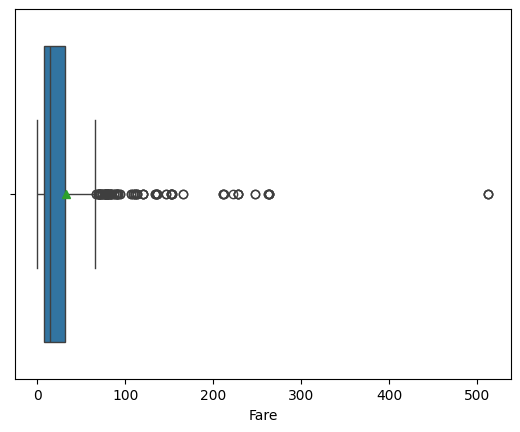

In [47]:
sns.boxplot(data=records, x='Fare', showmeans=True)

**Explore other categorical data**

In [48]:
records.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

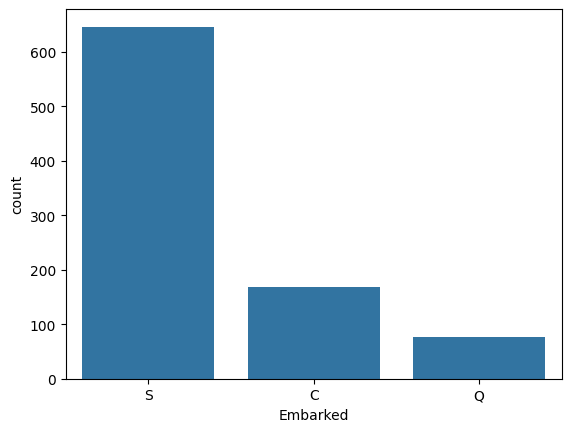

In [49]:
sns.countplot(data=records, x='Embarked')

In [50]:
cat_columns=['Survived', 'Pclass', 'SibSp', 'Parch', 'Sex','Embarked']

Value counts for column 'Survived':
Survived
0    549
1    342
Name: count, dtype: int64



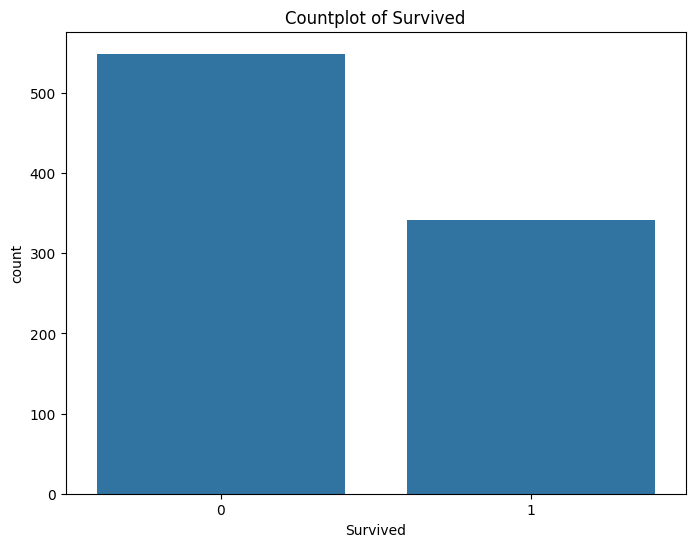

Value counts for column 'Pclass':
Pclass
3    491
1    216
2    184
Name: count, dtype: int64



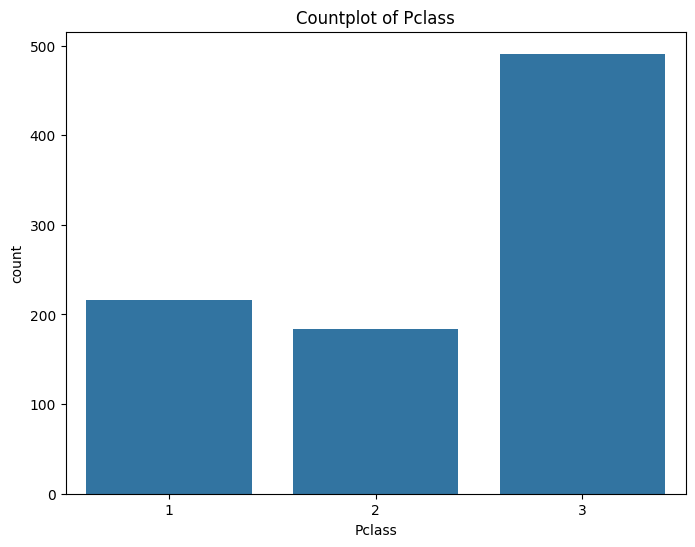

Value counts for column 'SibSp':
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64



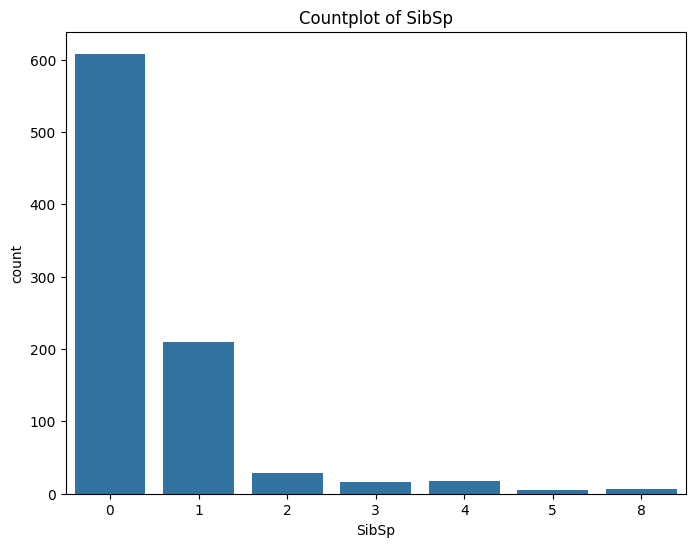

Value counts for column 'Parch':
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64



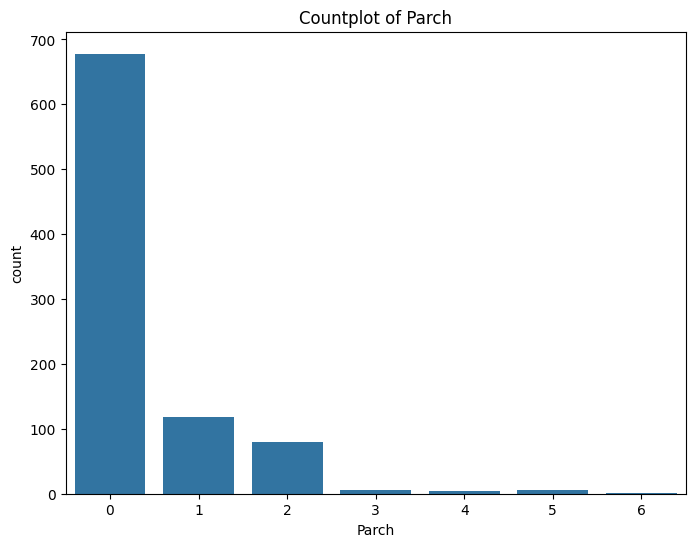

Value counts for column 'Sex':
Sex
male      577
female    314
Name: count, dtype: int64



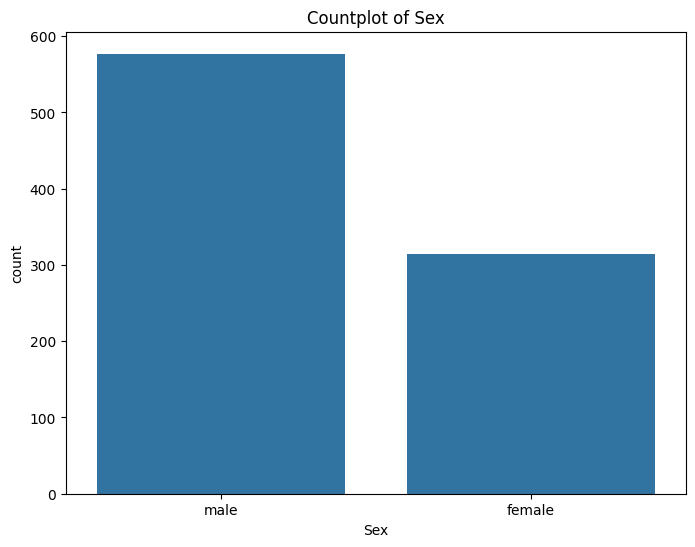

Value counts for column 'Embarked':
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64



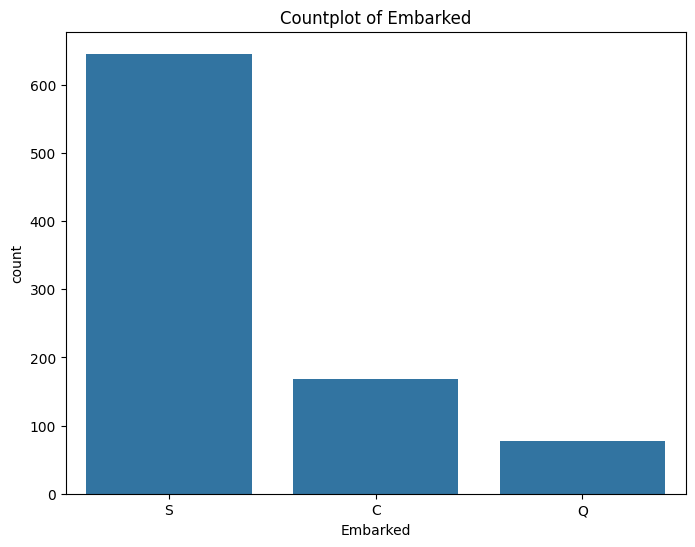

In [51]:
for col in cat_columns:
  # Value counts
  value_counts = records[col].value_counts()
  print(f"Value counts for column '{col}':\n{value_counts}\n")

  # Boxplot
  plt.figure(figsize=(8, 6))
  sns.countplot(data=records, x=records[col])
  plt.title(f'Countplot of {col}')
  plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


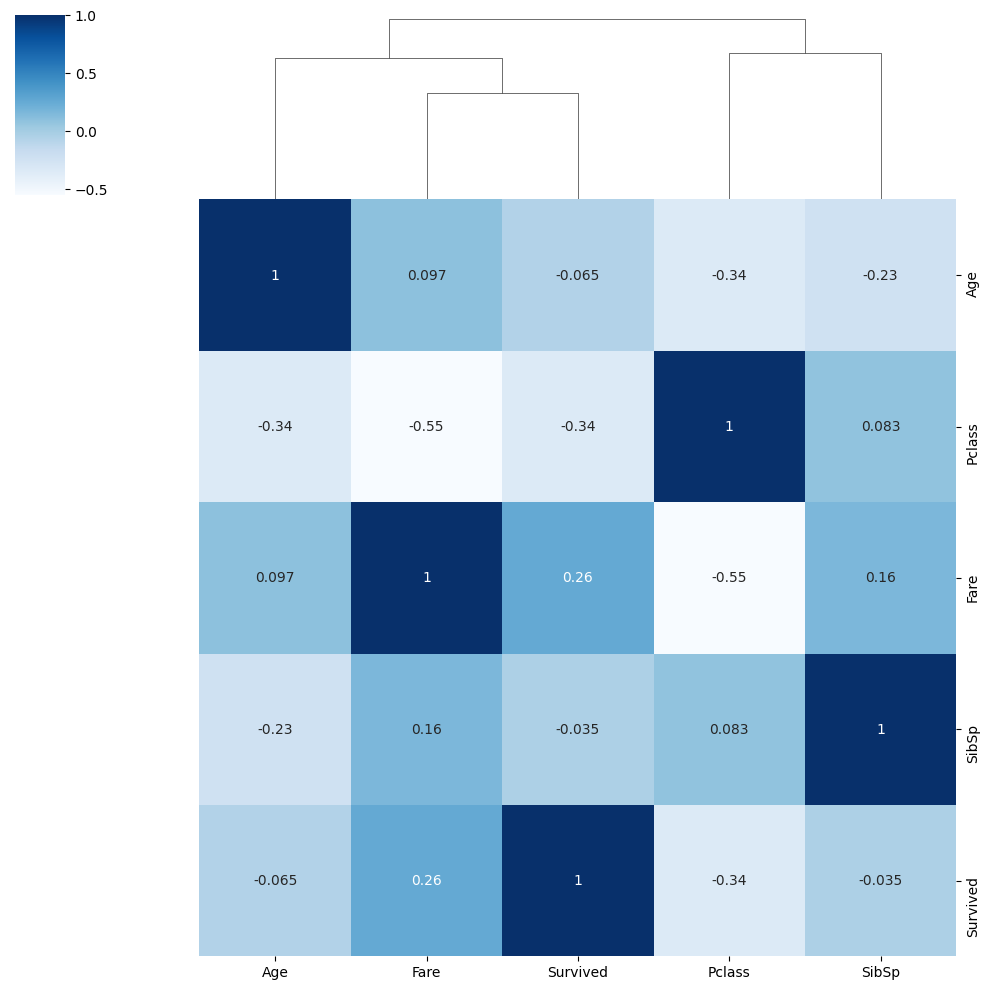

In [52]:
#for example, generate dendrograms to show hierarchical clustering
sns.clustermap(records[['Age','Pclass','Fare','SibSp','Survived']].corr(), square=True, cmap='Blues', annot=True, row_cluster=False)

## **2.5 Convert categorical data to numeric**


In [53]:
cat_columns=['Sex','Embarked']
#Convert categorical variables to numerical using get dummies
records=pd.get_dummies(records, columns=cat_columns, drop_first=True)

print(records.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB
None


## **2.6 Select Features and Target**
Select predictors (attributes) for Classification Set role (Target)

In [54]:
##write your code to select predictors
features=['Age','Sex_male', 'Pclass','Fare', 'SibSp','Parch','Embarked_Q','Embarked_S']
X=records[features]

In [55]:
y=records['Survived']

## **2.7 Split the Dataset**
Split arrays or matrices into random train and test subsets https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

In [56]:
##write your code to split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)  # 80% training and 20% testing

#inspect the split datasets
print(X_train.head())
print(y_train.head())

print('Training dataset size:',X_train.shape[0])
print('Test dataset size:',X_test.shape[0])

      Age  Sex_male  Pclass     Fare  SibSp  Parch  Embarked_Q  Embarked_S
368  28.0     False       3    7.750      0      0        True       False
542  11.0     False       3   31.275      4      2       False        True
49   18.0     False       3   17.800      1      0       False        True
667  28.0      True       3    7.775      0      0       False        True
297   2.0     False       1  151.550      1      2       False        True
368    1
542    0
49     0
667    0
297    0
Name: Survived, dtype: int64
Training dataset size: 712
Test dataset size: 179


## **2.8 Train a Logistic Regression Model and Make Predictions**

(Model implementation)

1.  Initialise /create an empty object decisiontreeclassifier (model)
2.  Train the model using the training dataset
3.  Make prediction using the model for the test dataset

Train a model using the training dataset
Make prediction using the model for the test dataset

Read about DecisionTreeClassifier at: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [57]:
##write your code to create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=7) #default criterion is gini, max_depth=25

##write your code to train Decision Tree Classifer with the traning dataset
clf = clf.fit(X_train, y_train)

##write your code to make predictions for the test dataset
y_pred = clf.predict(X_test)


### **Inspect Predictions**

In [58]:
#join unseen y_test with predicted value into a data frame
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

#join X_test with the new dataframe
inspection=pd.concat([X_test,inspection], axis=1)

inspection.sample(20)

,Age,Sex_male,Pclass,Fare,SibSp,Parch,Embarked_Q,Embarked_S,Actual,Predicted
816,23.0,False,3,7.9250,0,0,False,True,0,0
590,35.0,True,3,7.1250,0,0,False,True,0,0
687,19.0,True,3,10.1708,0,0,False,True,0,0
475,28.0,True,1,52.0000,0,0,False,True,0,1
525,40.5,True,3,7.7500,0,0,True,False,0,0
543,32.0,True,2,26.0000,1,0,False,True,1,0
459,28.0,True,3,7.7500,0,0,True,False,0,0
425,28.0,True,3,7.2500,0,0,False,True,0,0
187,45.0,True,1,26.5500,0,0,False,True,1,0
217,42.0,True,2,27.0000,1,0,False,True,0,0


## **2.9 Evaluate Model Performance and Optimise Threshold**


(Performance Evaluation)


1. Generate confusion matrix and classification report   
2. Calculate Accuracy, Precision, Recall, F1 separately when needed


Classification metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics


In [59]:
#print confusion matrix and evaluation report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[95 15]
 [20 49]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       110
           1       0.77      0.71      0.74        69

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [60]:
#Model Evaluation, calculate metrics: Accuracy, Precision, Recall, F1,
print("Accuracy: ", '%.3f' % metrics.accuracy_score(y_test,y_pred))
print("Precision: ",'%.3f' % metrics.precision_score(y_test,y_pred))
print("Recall: ", '%.3f' % metrics.recall_score(y_test,y_pred))
print("F1: ", '%.3f' % metrics.f1_score(y_test,y_pred))

Accuracy:  0.804
Precision:  0.766
Recall:  0.710
F1:  0.737


### **Plot ROC (Receiver operating characteristic) curve and confusion matrix**

ROC surve
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html?highlight=plot_roc_curve#sklearn.metrics.plot_roc_curve

Confusion matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html?highlight=plot%20confusion%20matrix#sklearn.metrics.plot_confusion_matrix

In [61]:
#get predicted probabilities for the main class
y_pred_probs = clf.predict_proba(X_test)
y_pred_probs = y_pred_probs[:, 1]


In [62]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

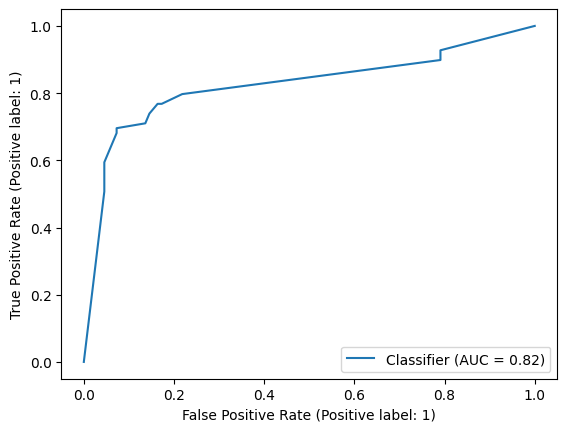

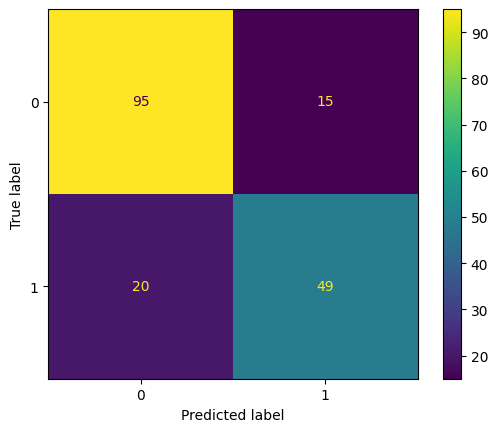

In [63]:
RocCurveDisplay.from_predictions(y_test, y_pred_probs)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [64]:
#Calculate and print AUC
auc = roc_auc_score(y_test, y_pred_probs)
print('AUC:', auc)

AUC: 0.8235836627140976


### **Optimise the threshold**

**Option 1: using the distance between tpr - fpr**

In [65]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

In [66]:
# Find best threshold based on the distance between tpr - fpr
optimal_idx = (tpr - fpr).argmax()
best_threshold = thresholds[optimal_idx]

print('Best thredshold', best_threshold)


Best thredshold 0.8


Plot it

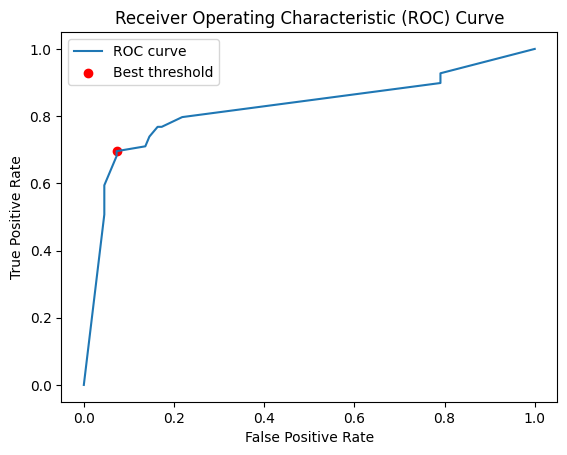

In [67]:
# plot the ROC curve and the best point
plt.plot(fpr, tpr, label='ROC curve')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label='Best threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**Option 2: using the highest accuracy score**

In [68]:
# initialize variables to store the best threshold and the highest accuracy score
best_threshold = None
highest_ac_score = 0


In [69]:
# iterate over the thresholds and compute the accuracy score for each
for threshold in thresholds:
  y_pred_test = (y_pred_probs >= threshold).astype(int)
  ac_score = metrics.accuracy_score(y_test, y_pred_test)
  if ac_score > highest_ac_score:
    highest_ac_score = ac_score
    best_threshold = threshold


In [70]:
# print the best threshold and the highest AUC score on the test data
print('Best threshold:', best_threshold)
print('Highest accuracy score:', highest_ac_score)

Best threshold: 0.8
Highest accuracy score: 0.8379888268156425


In [71]:
# Assign predictions based on the new threshold
y_pred = (y_pred_probs >= best_threshold).astype(int)

In [72]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[102   8]
 [ 21  48]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       110
           1       0.86      0.70      0.77        69

    accuracy                           0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179



Plot it

In [73]:
# Find the index corresponding to the specific threshold
best_index = (np.abs(thresholds - best_threshold)).argmin()


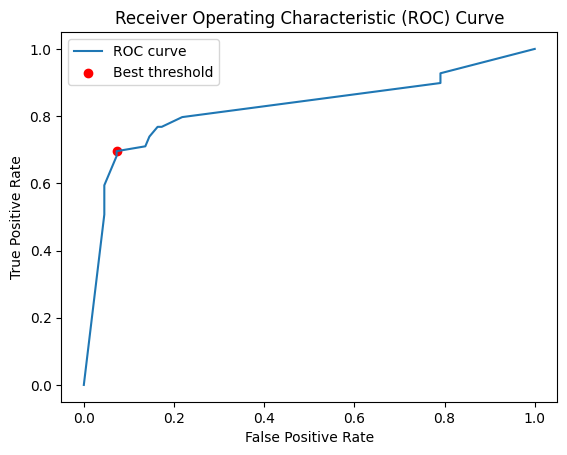

In [74]:
# plot the ROC curve and the best point
plt.plot(fpr, tpr, label='ROC curve')
plt.scatter(fpr[best_index], tpr[best_index], marker='o', color='red', label='Best threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## **2.10 Visualise the trees**

Not all classification machine learning models can be visualised.

In [75]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

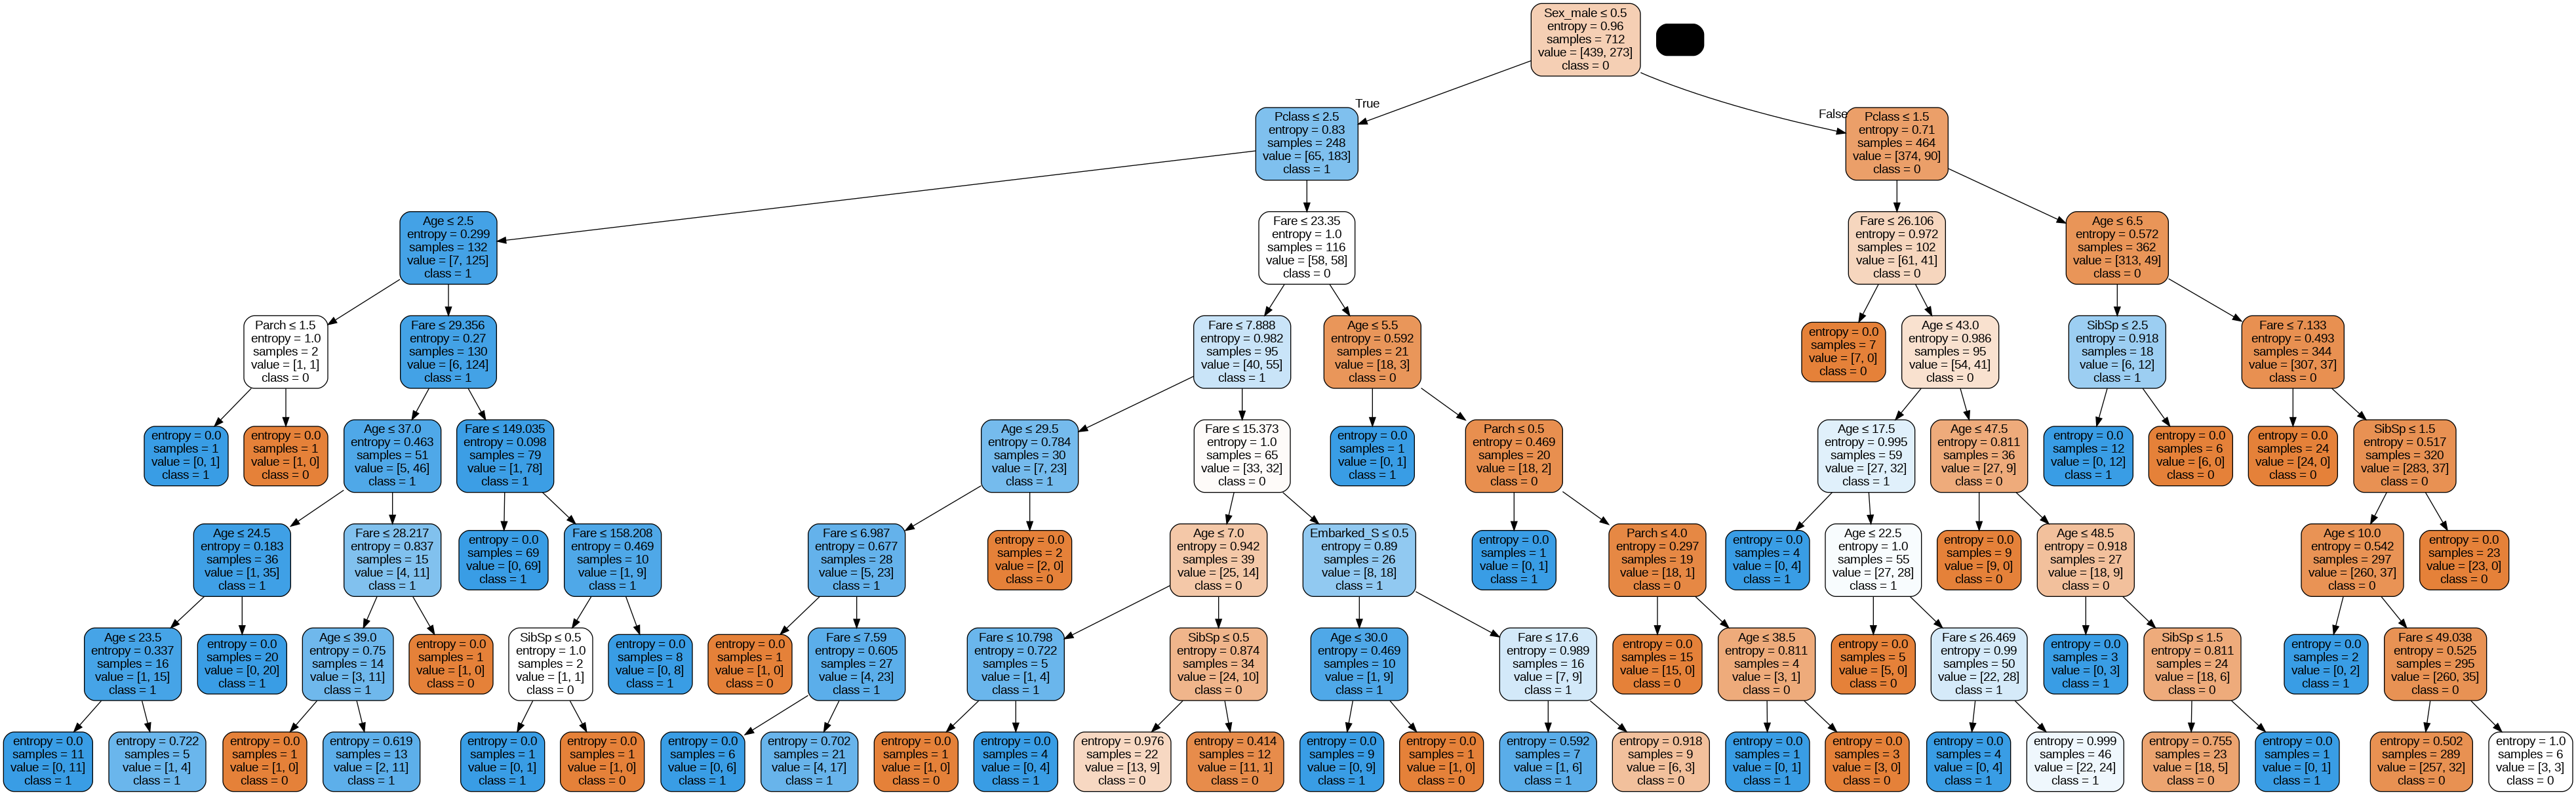

In [76]:
#Import libraries and classes
from six import StringIO
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Biopsy.png')
Image(graph.create_png())

# **Task 3: House Price Estimation**

Dataset: HousingPrice

Source: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

The dataset was modified to allow you deal with missing data.
**Download the modified data at the unit site.**

## **3.1 Import libraries and functions**

In [77]:
# import libraries
import pandas as pd #for data manipulation and analysis
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from pandas.io.parsers.readers import annotations

from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Regressor

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for model evaluation

from sklearn.metrics import r2_score

## **3.2 Load data**

In [78]:
#write your code to load dataset from https://raw.githubusercontent.com/ABAL-DU/MIS710-Resources/main/Week%205/Housing3.csv
records = pd.read_csv('https://raw.githubusercontent.com/ABAL-DU/MIS710-Resources/main/Week%205/Housing3.csv')

#explore the dataset
print(records)

print('Sample size:', records.shape[0])
print('Number of columns:', records.shape[1])

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0                no             yes        2      yes        furnished   

## **3.3 Inspect and pre-process data**

In [79]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              536 non-null    object
 1   bedrooms          545 non-null    int64 
 2   bathrooms         545 non-null    int64 
 3   stories           545 non-null    int64 
 4   mainroad          539 non-null    object
 5   guestroom         545 non-null    object
 6   basement          545 non-null    object
 7   hotwaterheating   545 non-null    object
 8   airconditioning   545 non-null    object
 9   parking           545 non-null    int64 
 10  prefarea          545 non-null    object
 11  furnishingstatus  538 non-null    object
 12  price             545 non-null    int64 
dtypes: int64(5), object(8)
memory usage: 55.5+ KB


In [80]:
#area is wrongly documented as string
records['area'] = records['area'].apply(pd.to_numeric, errors='coerce')

### **Inspect and treat missing data**

In [81]:
records.isnull().sum().sort_values(ascending=False)

area                10
furnishingstatus     7
mainroad             6
bedrooms             0
bathrooms            0
stories              0
guestroom            0
basement             0
hotwaterheating      0
airconditioning      0
parking              0
prefarea             0
price                0
dtype: int64

Note: in Lab 3 we detected spaces in some columns were also missing data

In [82]:
##write your code to replace empty strings (" ") with NaN
records.replace(" ", pd.NA, inplace=True)

In [83]:
print(records.isnull().sum().sort_values(ascending=0))

area                10
furnishingstatus     8
mainroad             6
basement             1
airconditioning      1
prefarea             1
bedrooms             0
bathrooms            0
stories              0
guestroom            0
hotwaterheating      0
parking              0
price                0
dtype: int64


In [84]:
#Fill in missing numerical data with mean and categorical data with mode
records['area'].fillna(records['area'].median(),inplace=True)
records['furnishingstatus'].fillna(records['furnishingstatus'].mode()[0], inplace=True) #note, there can be more than one mode

##write your code to do it yourself for other missing data
records['mainroad'].fillna(records['mainroad'].mode()[0], inplace=True)
records['basement'].fillna(records['basement'].mode()[0], inplace=True)
records['airconditioning'].fillna(records['airconditioning'].mode()[0], inplace=True)
records['prefarea'].fillna(records['prefarea'].mode()[0], inplace=True)

In [85]:
print(records.isnull().sum().sort_values(ascending=0))

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64


## **3.4 Conduct Exploratory Data Analysis (EDA)**
1. Univariate analysis
2. Bivariate analysis
3. Multivariate analysis

Note:
> Numeric variables
*   Summarise data through mean, median (Q2), Q1, Q3, range, Interquartile Range (IQR), outliers, standard deviation, and variance.
*   Explore distributions using histograms, boxplots, kernel density estimates, and QQ plots of continuous variables.

> Categorical variables
*   Summarise data through mode(s), counts and percentages of unique categories.
*   Explore bar charts, pie charts, or frequency tables of categorical variables.

> Explore relationships between two or more variables  
*   Compare two continuous variables using their descriptive statistics (such as means, medians, and Inter Quartile Range (IQR), range) and explore the relationship between them using scatterplots and correlation coefficients.
*   Explore the relationship between two categorical variables using a two-way contingency table (crosstab), clustered bar charts, stacked bar charts or a mosaic plot.
*   Explore the relationship between one numeric and one categorical variable, through using and grouped boxplots, violin plots, and histograms.
*   Explore correlations among multiple (selected) numeric variables using heatmaps of the correlation matrix.


3. Convert data as needed
You can also explore logistic regression relationships between two variables.

### **Univariate analysis**
Explore and visualise each variable at a time


In [86]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area              545 non-null    float64
 1   bedrooms          545 non-null    int64  
 2   bathrooms         545 non-null    int64  
 3   stories           545 non-null    int64  
 4   mainroad          545 non-null    object 
 5   guestroom         545 non-null    object 
 6   basement          545 non-null    object 
 7   hotwaterheating   545 non-null    object 
 8   airconditioning   545 non-null    object 
 9   parking           545 non-null    int64  
 10  prefarea          545 non-null    object 
 11  furnishingstatus  545 non-null    object 
 12  price             545 non-null    int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB


In [87]:
#overview of numeric data
records.describe()


,area,bedrooms,bathrooms,stories,parking,price
count,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5132.917431,2.965138,1.286239,1.805505,0.693578,4.766729e+06
std,2165.224760,0.738064,0.502470,0.867492,0.861586,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,4510.000000,3.000000,1.000000,2.000000,0.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


In [88]:
#you can add other numeric columns, but really do stats like means, median, sdt make sense?
numeric_columns=['area', 'bedrooms','price']

Descriptive stats of area
count      545.000000
mean      5132.917431
std       2165.224760
min       1650.000000
25%       3600.000000
50%       4510.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64


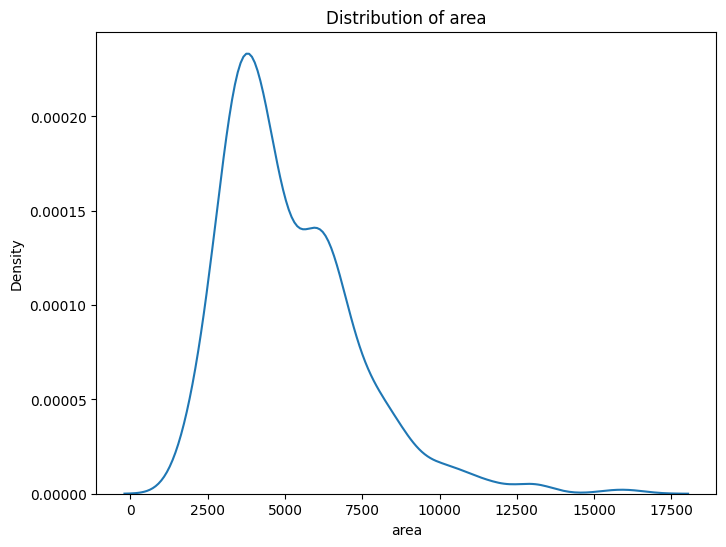

Descriptive stats of bedrooms
count    545.000000
mean       2.965138
std        0.738064
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        6.000000
Name: bedrooms, dtype: float64


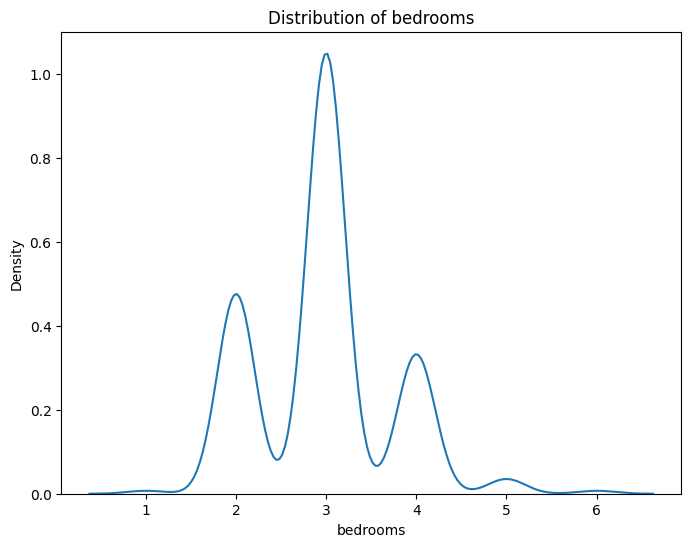

Descriptive stats of price
count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64


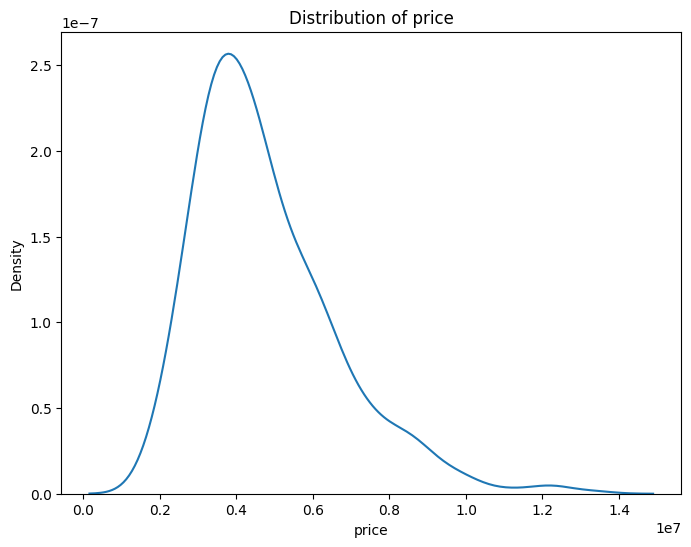

In [89]:
for col in numeric_columns:
  # Value counts
  print(f'Descriptive stats of {col}')
  print(records[col].describe())

  # Boxplot
  plt.figure(figsize=(8, 6))
  sns.kdeplot(data=records, x=records[col])
  plt.title(f'Distribution of {col}')
  plt.show()

You can add kde line on top of the distplot

<Axes: xlabel='area', ylabel='Count'>

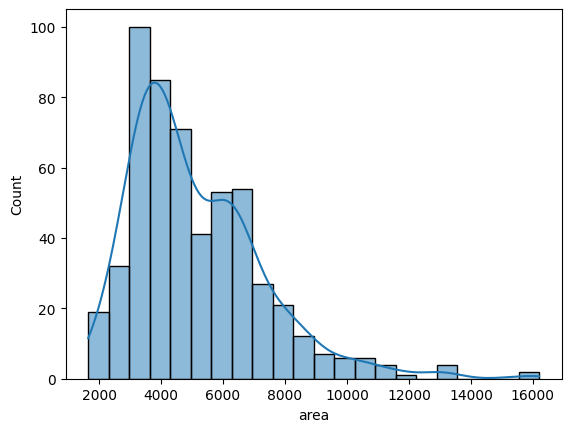

In [90]:
sns.histplot(data=records, x='area', kde=True)

<Axes: xlabel='area'>

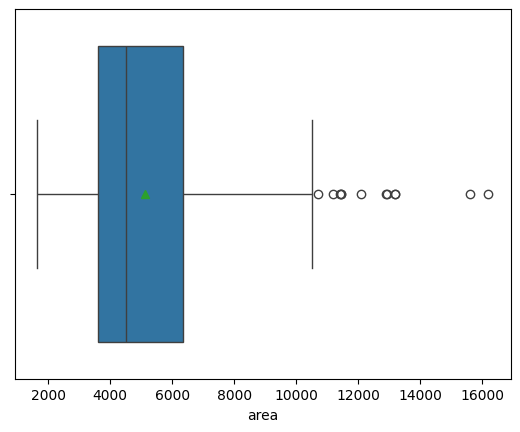

In [91]:
sns.boxplot(data=records, x='area', showmeans=True)

Note the skewed distributions - thus we replaced the missing data with median, not mean. And how we handle missing data and EDA and data encoding can be iterative activities; not linear, one step after another.  

In [92]:
cat_columns=['bedrooms', 'bathrooms', 'stories', 'mainroad', 'basement','hotwaterheating', 'airconditioning', 'parking', 'prefarea','furnishingstatus']

Value counts for column 'bedrooms':
bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64



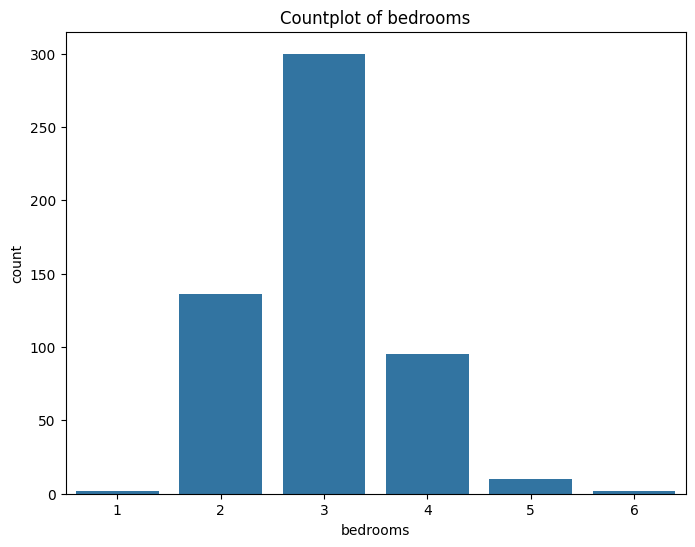

Value counts for column 'bathrooms':
bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64



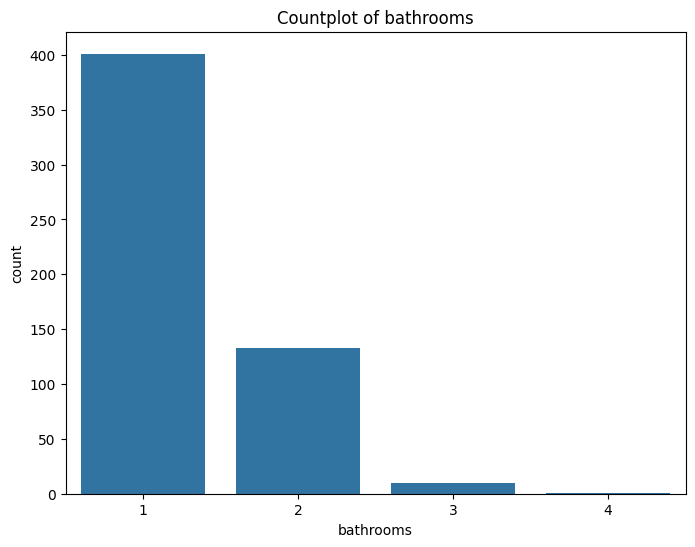

Value counts for column 'stories':
stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64



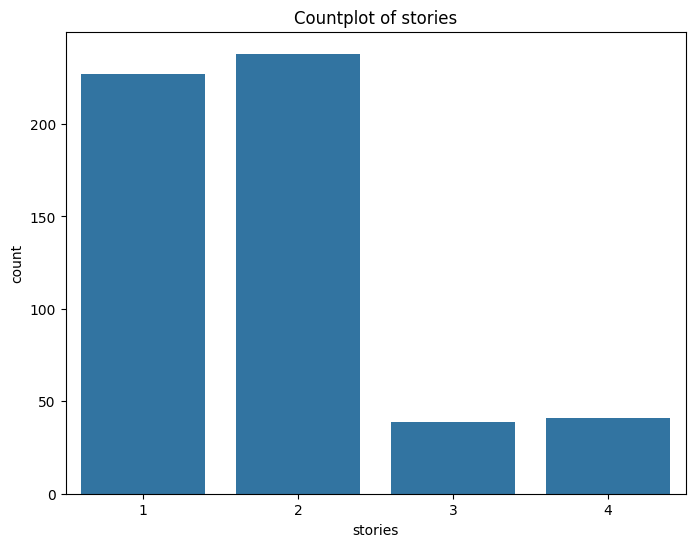

Value counts for column 'mainroad':
mainroad
yes    470
no      75
Name: count, dtype: int64



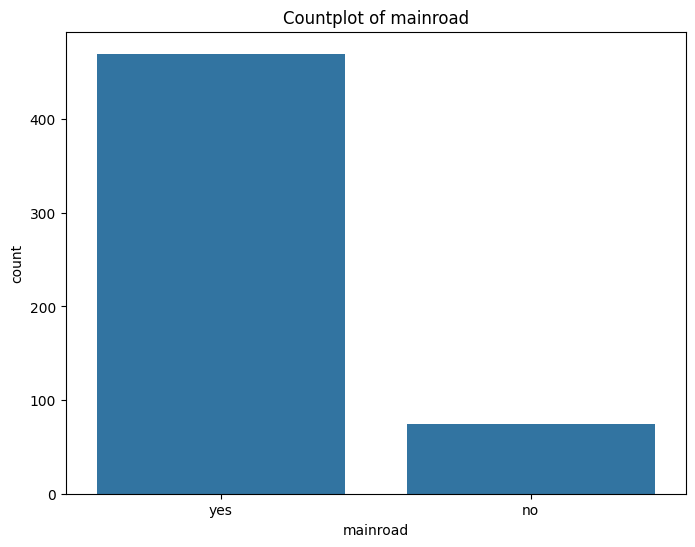

Value counts for column 'basement':
basement
no     355
yes    190
Name: count, dtype: int64



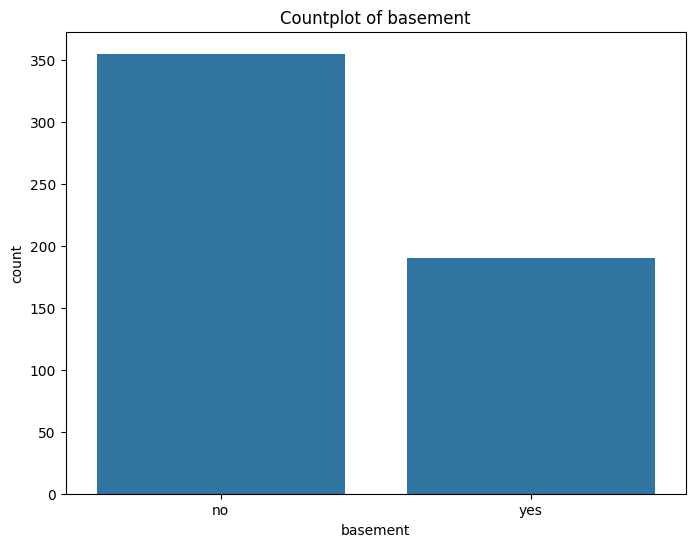

Value counts for column 'hotwaterheating':
hotwaterheating
no     520
yes     25
Name: count, dtype: int64



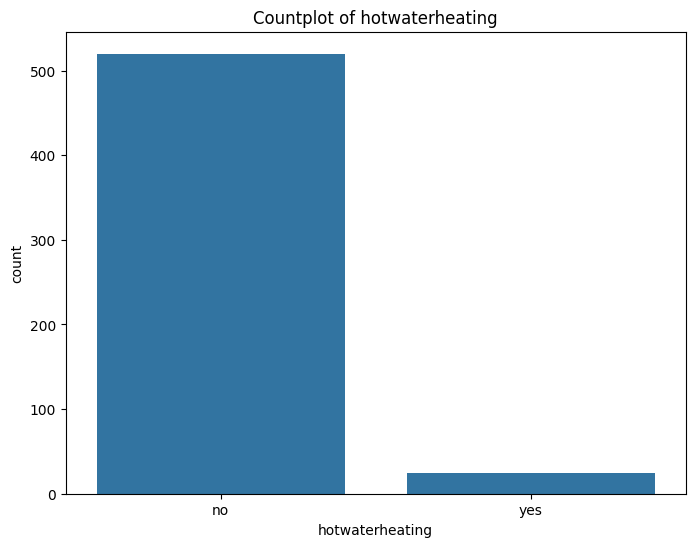

Value counts for column 'airconditioning':
airconditioning
no     373
yes    172
Name: count, dtype: int64



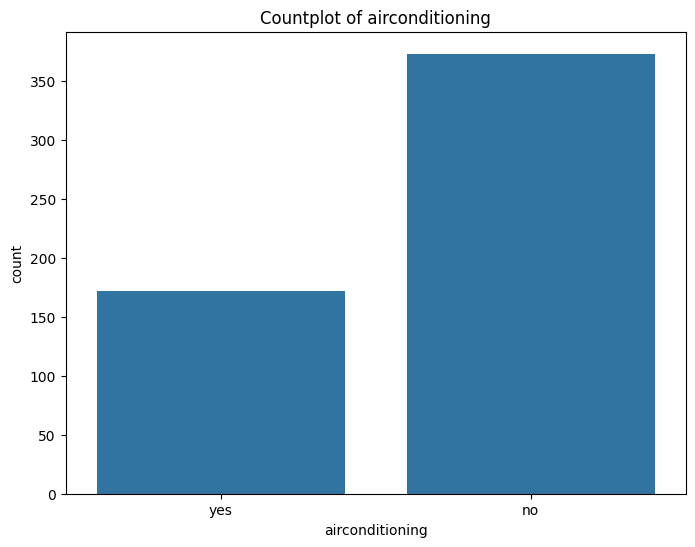

Value counts for column 'parking':
parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64



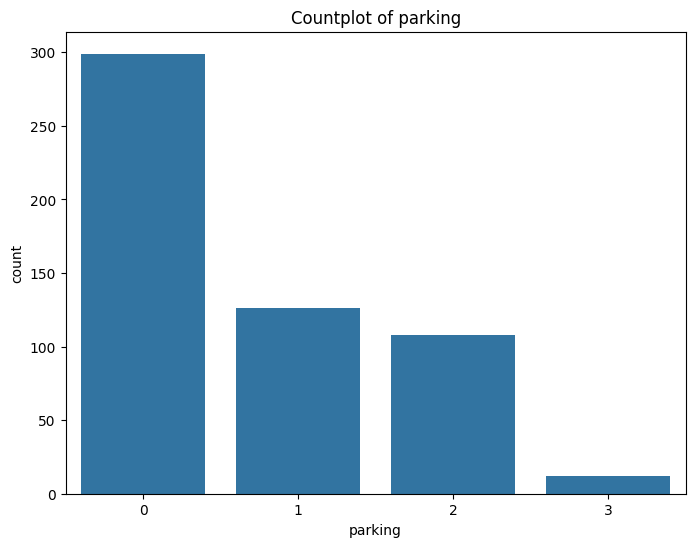

Value counts for column 'prefarea':
prefarea
no     417
yes    128
Name: count, dtype: int64



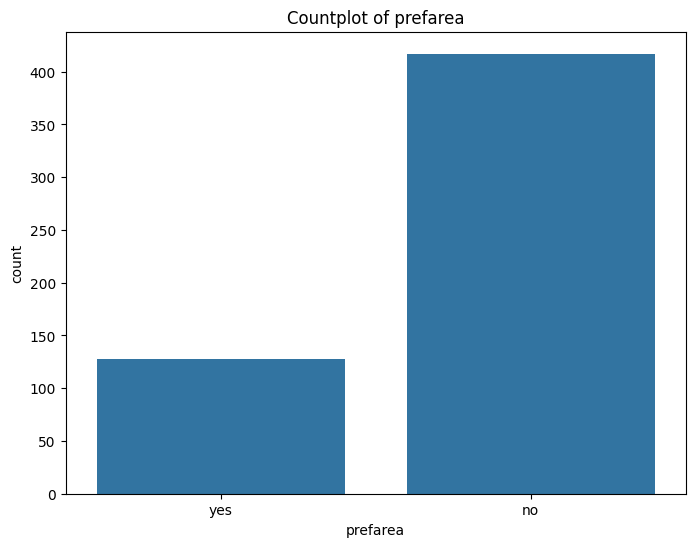

Value counts for column 'furnishingstatus':
furnishingstatus
semi-furnished    230
unfurnished       176
furnished         139
Name: count, dtype: int64



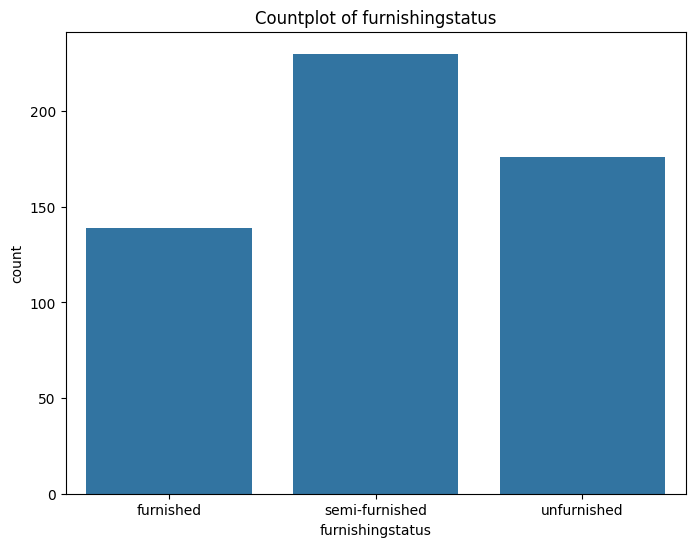

In [93]:
for col in cat_columns:
  # Value counts
  value_counts = records[col].value_counts()
  print(f"Value counts for column '{col}':\n{value_counts}\n")

  # Boxplot
  plt.figure(figsize=(8, 6))
  sns.countplot(data=records, x=records[col])
  plt.title(f'Countplot of {col}')
  plt.show()

In [94]:
#you can also use the built-in function mode; it returns a series, so get the first index, there can be more than one mode
print(records['furnishingstatus'].mode()[0])
print(records['mainroad'].mode()[0])

semi-furnished
yes


In [95]:
#find mode
print('Furnishing Status mode: ', records['furnishingstatus'].mode())

Furnishing Status mode:  0    semi-furnished
Name: furnishingstatus, dtype: object


### **Bivariate and Multivariate visualisation**

**Display a countplot for one categorical variable grouped by a second categorical variable**
https://seaborn.pydata.org/generated/seaborn.countplot.html

<Axes: xlabel='prefarea', ylabel='count'>

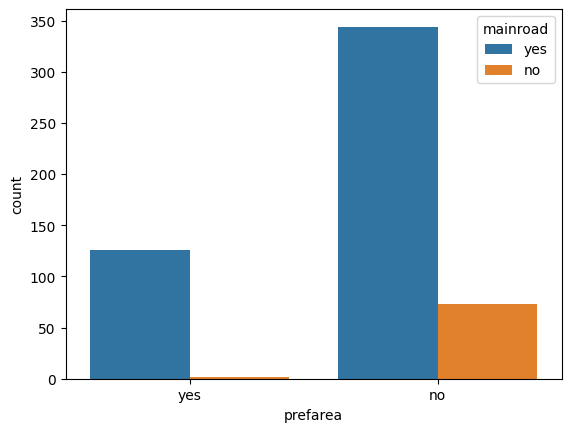

In [96]:
sns.countplot(data=records, x='prefarea', hue='mainroad')

<Axes: xlabel='furnishingstatus', ylabel='count'>

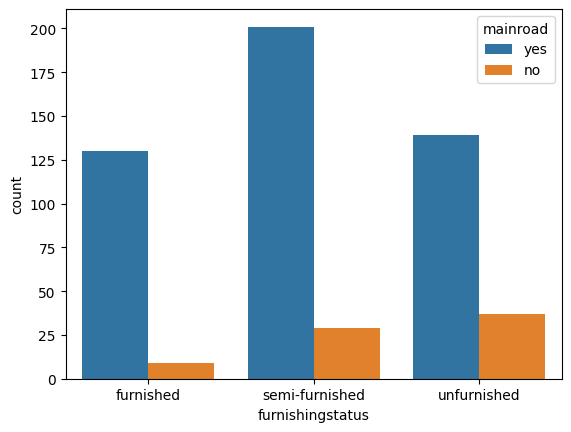

In [97]:
#Do it yourself for other categorical variables
sns.countplot(data=records, x='furnishingstatus', hue='mainroad')

**Compare distributions of numerical variables using boxplots**
https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: xlabel='price', ylabel='furnishingstatus'>

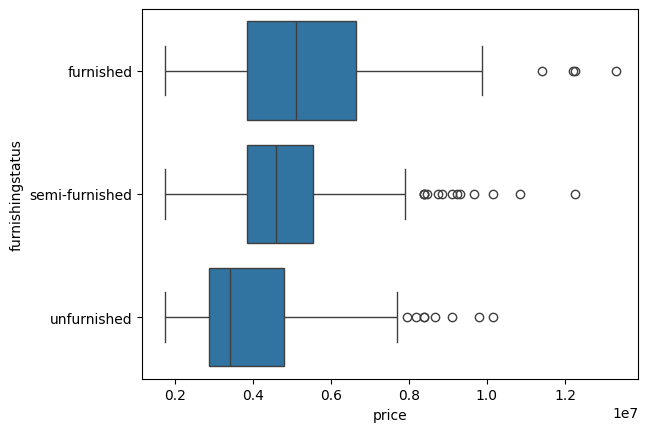

In [98]:
sns.boxplot(data=records, x='price', y='furnishingstatus')

<Axes: xlabel='price', ylabel='prefarea'>

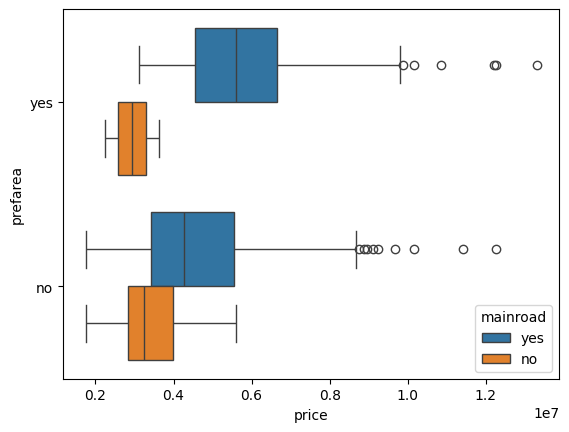

In [99]:
#Do it yourself for other variables, hint: using x=  y= and hue=
sns.boxplot(data=records, x='price', y='prefarea', hue='mainroad')

**Ploting diagram to see relationships between two numerical variables**
https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: xlabel='area', ylabel='price'>

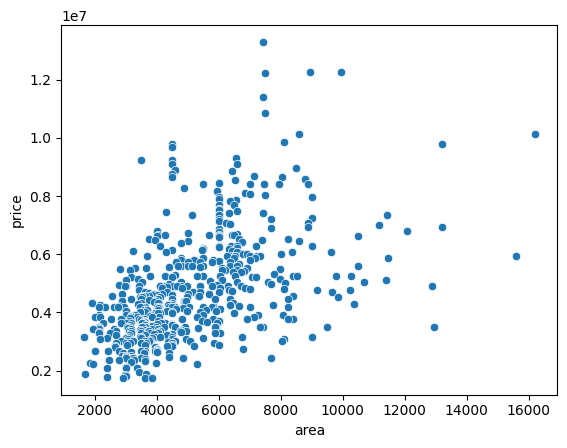

In [100]:
sns.scatterplot(data=records, x='area', y='price')

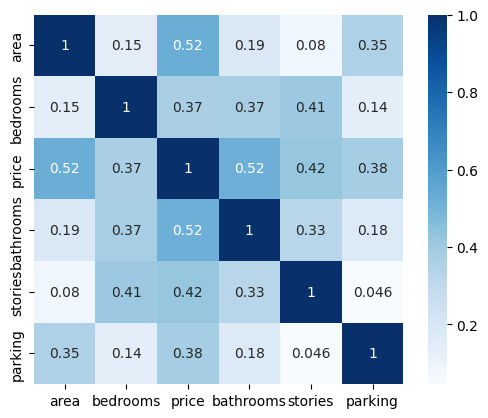

In [101]:
#generate heatmaps to explore relationships
numeric_columns=['area', 'bedrooms','price', 'bathrooms', 'stories','parking']
sns.heatmap(records[numeric_columns].corr(), square=True, cmap='Blues', annot=True)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


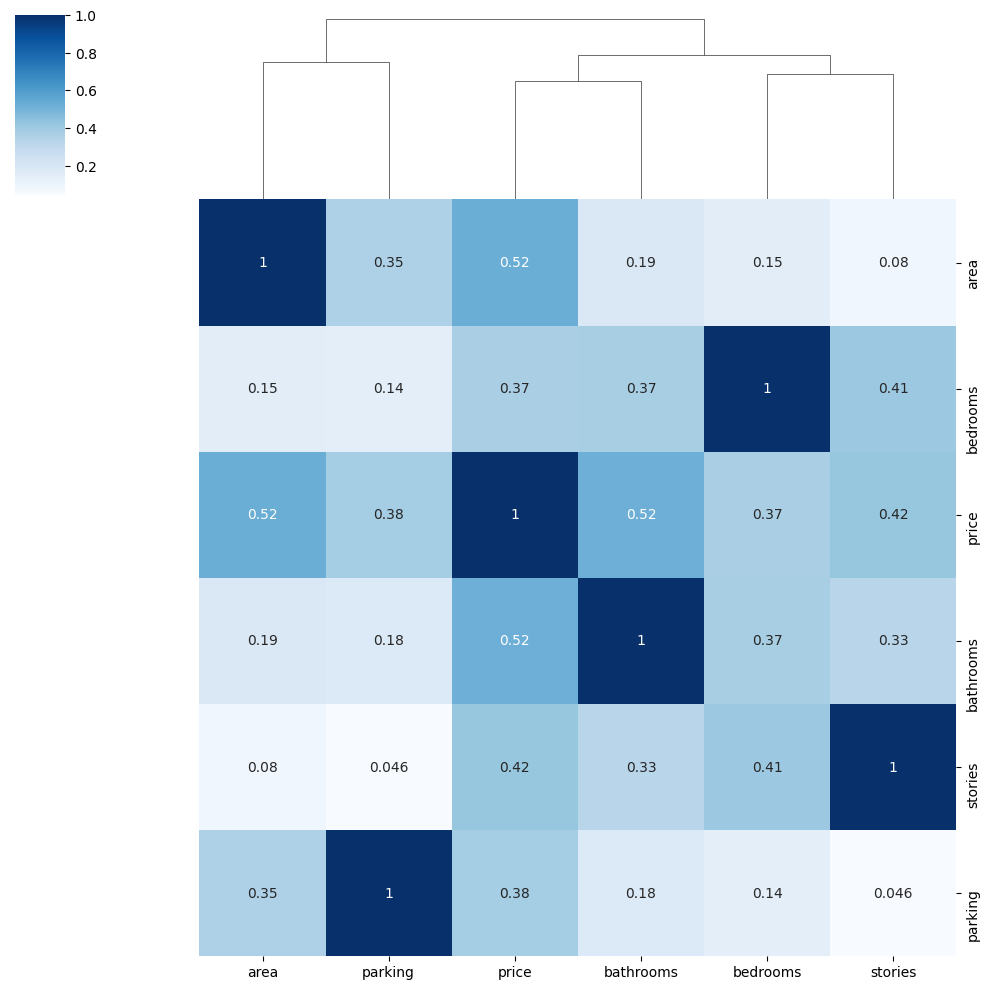

In [102]:
#generate dendrograms to show hierarchical clustering
sns.clustermap(records[numeric_columns].corr(), square=True, cmap='Blues', annot=True, row_cluster=False)
plt.show()

## **3.5 Prepare data (Convert data types)**

In [103]:
print(records.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area              545 non-null    float64
 1   bedrooms          545 non-null    int64  
 2   bathrooms         545 non-null    int64  
 3   stories           545 non-null    int64  
 4   mainroad          545 non-null    object 
 5   guestroom         545 non-null    object 
 6   basement          545 non-null    object 
 7   hotwaterheating   545 non-null    object 
 8   airconditioning   545 non-null    object 
 9   parking           545 non-null    int64  
 10  prefarea          545 non-null    object 
 11  furnishingstatus  545 non-null    object 
 12  price             545 non-null    int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB
None


In [104]:
#convert categorical variables to numeric
# Define the custom mapping
furnishing_mapping = {
    'furnished': 2,
    'semi-furnished': 1,
    'unfurnished': 0
}
# Convert the categories to numerical values using replace()
records['furnishingstatus_N'] = records['furnishingstatus'].replace(furnishing_mapping)

In [105]:
other_cat_variables = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Convert categorical variables into numeric using dummy encoding
records = pd.get_dummies(records, columns=other_cat_variables, drop_first=True)

In [106]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   area                 545 non-null    float64
 1   bedrooms             545 non-null    int64  
 2   bathrooms            545 non-null    int64  
 3   stories              545 non-null    int64  
 4   parking              545 non-null    int64  
 5   furnishingstatus     545 non-null    object 
 6   price                545 non-null    int64  
 7   furnishingstatus_N   545 non-null    int64  
 8   mainroad_yes         545 non-null    bool   
 9   guestroom_yes        545 non-null    bool   
 10  basement_yes         545 non-null    bool   
 11  hotwaterheating_yes  545 non-null    bool   
 12  airconditioning_yes  545 non-null    bool   
 13  prefarea_yes         545 non-null    bool   
dtypes: bool(6), float64(1), int64(6), object(1)
memory usage: 37.4+ KB


## **3.6 Select Features and Target**
Select predictors (attributes) for Classification Set role (Target)

In [107]:
##write your code to select predictors
features=['area','bedrooms', 'bathrooms','stories', 'parking','mainroad_yes','guestroom_yes','basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_N']
X=records[features]


In [108]:
#specify the label
y=records['price']
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

## **3.7 Split the Dataset**
Split arrays or matrices into random train and test subsets https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

In [109]:
#from sklearn.model_selection import train_test_split # Import train_test_split function

# Split dataset into training set 70% and test set 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  # 70% training and 30% testing

#inspect the split datasets
print(X_train.head())
print(y_train.head())

print('Training dataset size:',X_train.shape)
print('Test dataset size:',X_test.shape)


       area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
180  4500.0         4          2        1        2         False   
189  3540.0         2          1        1        0         False   
93   7200.0         3          2        1        3          True   
444  3120.0         3          1        2        0         False   
81   4000.0         3          2        2        1          True   

     guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
180          False          True                False                 True   
189           True          True                False                False   
93           False          True                False                 True   
444          False         False                False                False   
81           False          True                False                 True   

     prefarea_yes  furnishingstatus_N  
180         False                   1  
189         False                   1  
93

## **3.8 Training a Decision Tree Regressor and Make Predictions**
Train a model using the training dataset Make prediction using the model for the test dataset Read about DecisionTreeRegressor at:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

In [110]:
#Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
#instantiate a decision tree regressor and fit it with the training data
regressor = DecisionTreeRegressor(max_depth=20, max_leaf_nodes=15, random_state=1)

regressor

DecisionTreeRegressor(max_depth=20, max_leaf_nodes=15, random_state=1)

In [111]:
##write your code to train the regressor
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, max_leaf_nodes=15, random_state=1)

In [112]:
#predict prices
y_pred = regressor.predict(X_test)


In [113]:
#set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.0f' % x)
area=X_test['area']

#inspection
inspection=pd.DataFrame({'Area':area, 'Actual':y_test, 'Predicted':y_pred})
inspection.head(20)

,Area,Actual,Predicted
62,6240,7070000,6953649
247,8400,4550000,5753330
142,10500,5600000,11200000
107,6420,6125000,5676222
483,4510,2940000,4500899
351,3600,3780000,3640471
516,3240,2450000,3230146
47,6600,7490000,5753330
481,2700,2940000,3640471
90,5000,6440000,4500899


## **3.9 Evaluate the model performance**


In [114]:
#Evaluate the model
from sklearn import metrics
print('Mean Absolute Error:', '%.0f' % metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', '%.0f' % metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', '%.0f' %np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 1092985
Mean Squared Error: 2451169063402
Root Mean Squared Error: 1565621


In [115]:
print("R-squared: %.3f" % metrics.r2_score(y_test, y_pred))

R-squared: 0.398


In [116]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
inspection['Actual'].describe()

count        164
mean     4747046
std      2023711
min      1750000
25%      3360000
50%      4200000
75%      5783750
max     13300000
Name: Actual, dtype: float64

In [117]:
inspection['Predicted'].describe()

count        164
mean     4704027
std      1432816
min      3230146
25%      3537890
50%      4500899
75%      5753330
max     11200000
Name: Predicted, dtype: float64

## **3.10 Visualise the trees**

Not all classification machine learning models can be visualised.

In [118]:
#Import plot_tree to  extract rules and visualise the decition tree model
from sklearn.tree import plot_tree, export_text
from pandas.io.parsers.readers import annotations


In [119]:
# Convert feature_names to a list if it's an Index object
feature_names = list(features) if isinstance(features, pd.Index) else features

# Extract the decision rules
rules = export_text(regressor, feature_names=feature_names)
print(rules)

|--- area <= 5954.00
|   |--- bathrooms <= 1.50
|   |   |--- furnishingstatus_N <= 0.50
|   |   |   |--- stories <= 3.50
|   |   |   |   |--- value: [3230145.57]
|   |   |   |--- stories >  3.50
|   |   |   |   |--- value: [6440000.00]
|   |   |--- furnishingstatus_N >  0.50
|   |   |   |--- area <= 3692.50
|   |   |   |   |--- value: [3640471.15]
|   |   |   |--- area >  3692.50
|   |   |   |   |--- value: [4500898.55]
|   |--- bathrooms >  1.50
|   |   |--- area <= 3480.00
|   |   |   |--- value: [4357266.67]
|   |   |--- area >  3480.00
|   |   |   |--- prefarea_yes <= 0.50
|   |   |   |   |--- area <= 3565.00
|   |   |   |   |   |--- value: [9240000.00]
|   |   |   |   |--- area >  3565.00
|   |   |   |   |   |--- value: [5290250.00]
|   |   |   |--- prefarea_yes >  0.50
|   |   |   |   |--- value: [7336000.00]
|--- area >  5954.00
|   |--- bathrooms <= 1.50
|   |   |--- parking <= 0.50
|   |   |   |--- prefarea_yes <= 0.50
|   |   |   |   |--- value: [3936210.53]
|   |   |   |--- 

**Discuss the Interpretability vs Explainability of the model**

Interpretability relates to understanding how a machine learning model works, i.e., how it makes predictions based on input data.

Explainability focuses on whether the model's decision-making process makes sense from a human perspective.

An explainable model not only provides predictions but also provides human-understandable explanations or justifications for those predictions.

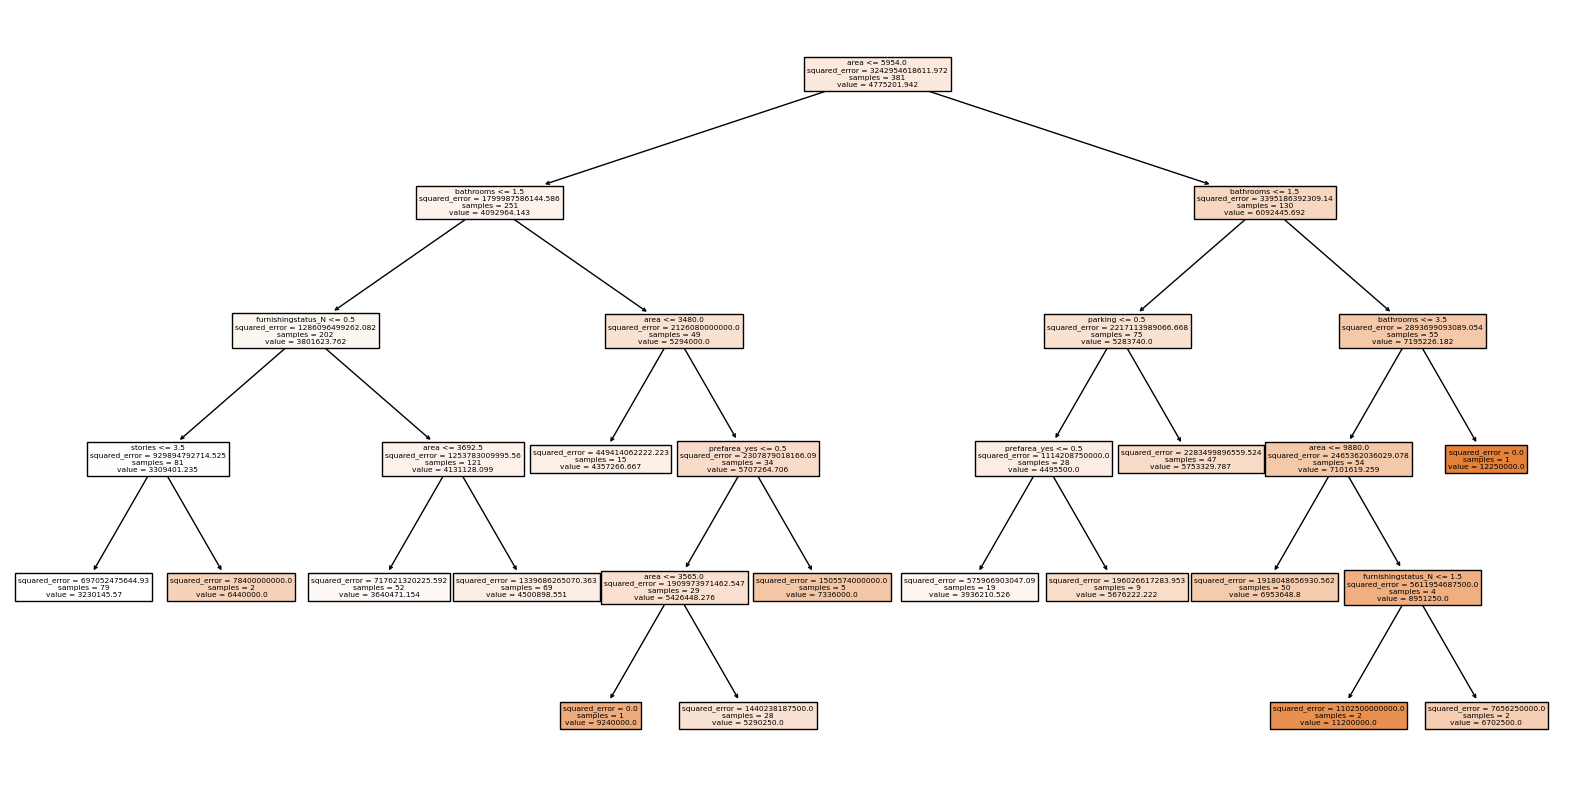

In [120]:
# visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(regressor, filled=True, feature_names=features, class_names=['0','1'])
plt.show()

**Optional**

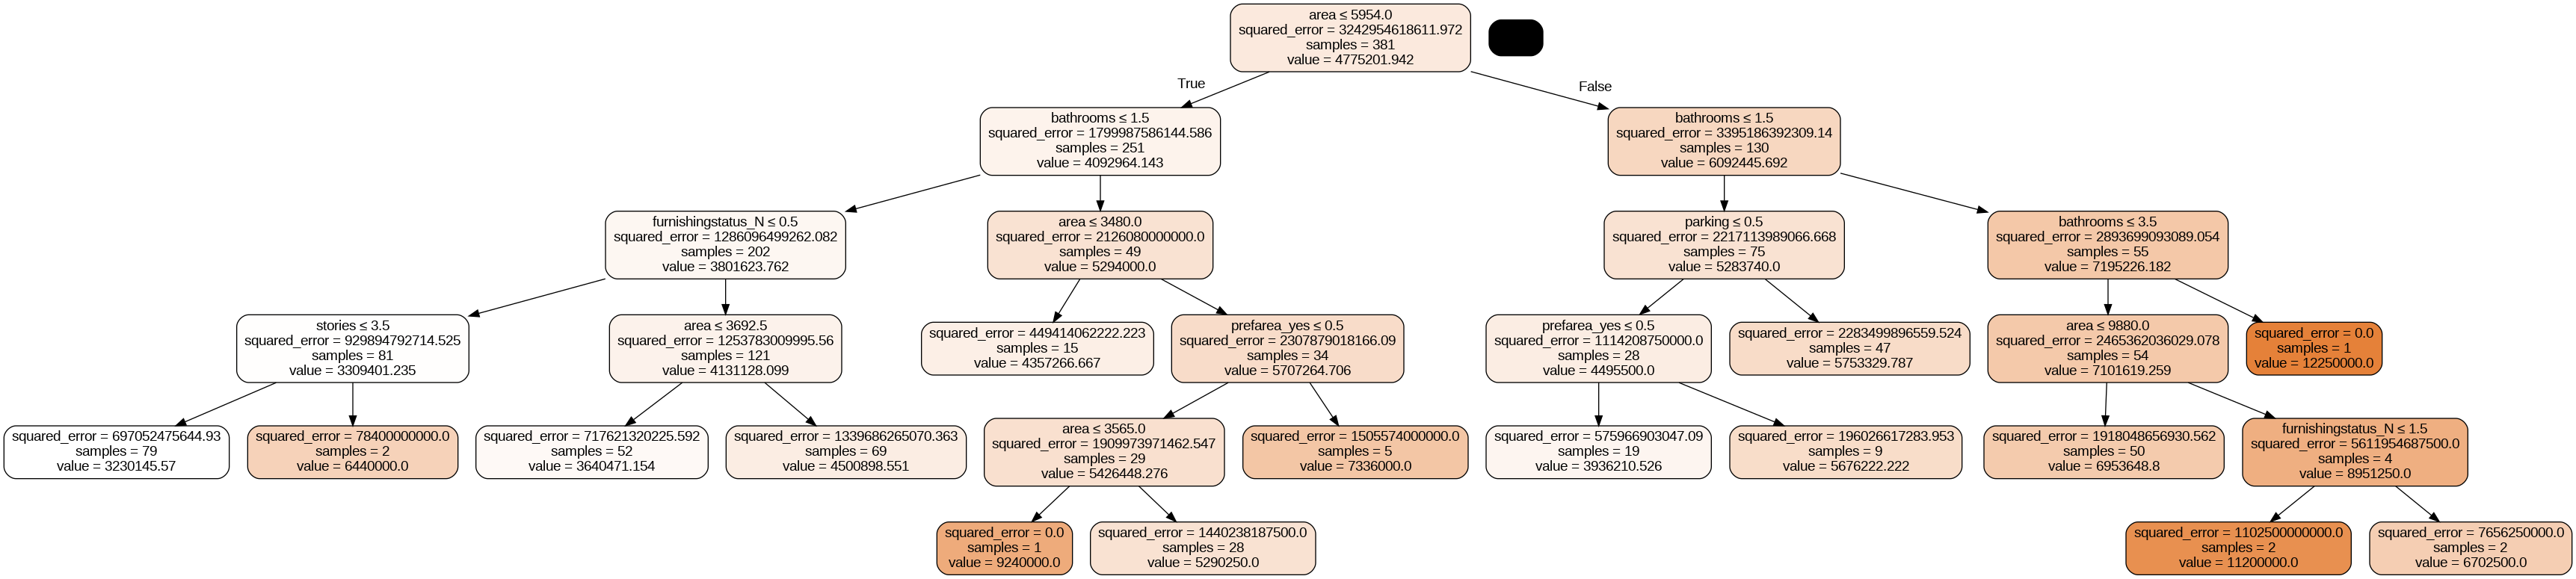

In [121]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data,
filled=True, rounded=True,
special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('HousePricePrediction.png')
Image(graph.create_png())
